## Project: Alternus Vera (Alternate Facts)

### Problem Statement: 
There is huge amount of information being generated and propogated on the internet. Unreliable sources of information expose people to a dose of fake news, hoaxes, rumors, conspiracy theories and misleading news. “Fake news” has acquired a certain legitimacy after being named word of the year by Collins, following what the dictionary called its “ubiquitous presence” over the last 12 months

### Following are the datasets explored as part of this project 

- Kaggles fake news dataset for Fake news 
- NYT API and The Guardian Post API to get real news
- LIAR dataset: https://www.cs.ucsb.edu/william/data/liar_dataset.zip
- BS Detector: https://github.com/bs-detector/bs-detector
- CredBank: compsocial.github.io/CREDBANK-data
- Buzzfeed News: https://github.com/BuzzFeedNews/everything
- Corpus of News on the Web (NOW): https://corpus.byu.edu/now/
- Google trends: https://trends.google.com/trends/
- Click Bait(y) dataset from Kaggle: The Examiner - SpamClickBait News Dataset: https://www.kaggle.com/therohk/examine-the-examiner
- Click Bait Challenge: https://www.clickbait-challenge.org/#data

###  Classification of websites/links/text:

- Fake News: Sources that fabricate stories out of whole cloth with the intent of pranking the public.
- Satire: Sources that provide humorous commentary on current events in the form of fake news.
- Extreme Bias: Sources that traffic in political propaganda and gross distortions of fact.
- Conspiracy Theory: Sources that are well-known promoters of kooky conspiracy theories.
- Rumor Mill: Sources that traffic in rumors, innuendo, and unverified claims.
- State News: Sources in repressive states operating under government sanction.
- Junk Science: Sources that promote pseudoscience, metaphysics, naturalistic fallacies, and other scientifically dubious claims.
- Hate Group: Sources that actively promote racism, misogyny, homophobia, and other forms of discrimination.
- Clickbait: Sources that are aimed at generating online advertising revenue and rely on sensationalist headlines or eye-catching pictures.
- Proceed With Caution: Sources that may be reliable but whose contents require further verification.

Reference : http://bsdetector.tech/

### Below features which we found would be good to categorise whether the article/news is fake or not 

1. Political affiliation
2. Social Media
3. Context
4. Rumour Analysis 
5. Bias
6. Content 
7. Marketing
8. Domain Ranking
9. Malicious accounts
10. Authenticity
11. Spam detection
12. Credibility
13. Stance detection
14. Click-Bait

### I have identified few below which we can give percentages to - we need to identify why we picked these up 

1.	Political affiliation   - Kaggle /Liar -Liar + NYT + Guardian 
2.	Social Media (yellow press + internet)  -  https://github.com/KaiDMML/FakeNewsNet + Kaggel dataset
3.	Domain Ranking  -https://github.com/several27/FakeNewsCorpus
4.	Stance Detection - http://www.fakenewschallenge.org/ + dataset in the same link
5.	Fact checks  https://github.com/sumeetkr/AwesomeFakeNews + dataset in the git link
6.  Click Bait  - click bait challenge 
7.  Bias -  https://github.com/clips/news-audit

### Also include any datasets you guys have explored in the 'dataset part' of the document


### WorkFlow 

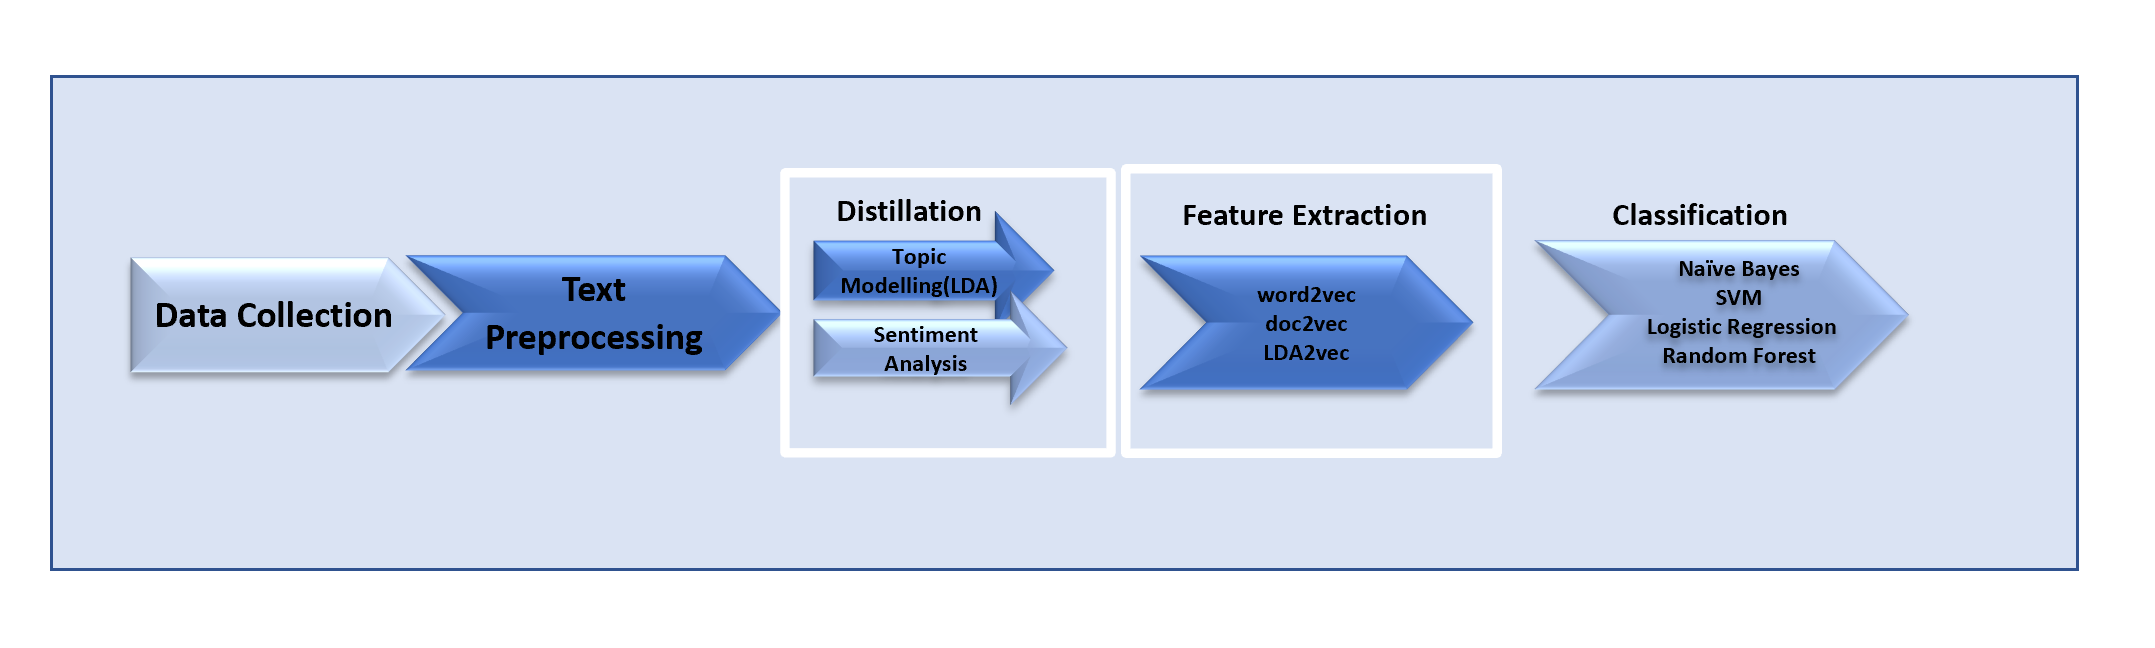

### Initial Dataset - LIAR Dataset  - for political affiliation

William Yang Wang introduced a daataset called LIAR. This is a new, publicly available data set for detection of fake news. Automatic fake news detection is a challenging problem in deception detection, and it has tremendous real-world political and social impacts. However, statistical approaches to combating fake news has been dramatically limited by the lack of labeled benchmark datasets. In this paper, we present liar: a new, publicly available dataset for fake news detection. We collected a decade-long, 12.8K manually labeled short statements in various contexts from PolitiFact.com, which provides detailed analysis report and links to source documents for each case. This dataset can be used for fact-checking research as well. Notably, this new dataset is an order of magnitude larger than previously largest public fake news datasets of similar type.

Reference: https://www.researchgate.net/publication/316643096_Liar_Liar_Pants_on_Fire_A_New_Benchmark_Dataset_for_Fake_News_Detection


### Text Preprocessing 

### 1. Cleaning 

- Converting text to lower case 
        - assuming the corpus is in english , I do not want words starting with capital letter at the beginning of the sentence and the same word occuring in the sentence to be treated differently. 
- Stopword removal
- Removing punctuation 

### 2. Annotation
    - Annotation is based on evaluations by professional editors. The labels take discrete values from 1 to 6 corresponding to pants-fire, false,barely-true, half-true, mostly-true, and true.

The statements are categorised into the following labels 
1. pants-fire
2. FALSE
3. barely-true 
4. half-true
5. mostly-true
6. TRUE

### 3. Normalization 
    - linguistic reduction 
1. Stemming
2. Lemmatization


### Order matters in preprocessing !!

The order of steps in text processing matters a lot if you are trying to extract other features alongside a simple "Bag of Words" or "Word Salad" model. For instance, if you want to count the number of question marks in the email text then you should probably do it before removing all punctuation, but after replacing all http addresses (which sometimes contain special characters).

Here is a rough outline of all the steps we'll take to get from a messy, marked-up raw text to a delicious word salad:
- Strip any HTML tags and leave only text content (also count HTML tags)
- Lowercase everything
- Strip all email and web addresses (also count them)
- Strip all dollar signs and numbers (also count them)
- Strip away all other punctuation (also count exclamation and question marks)
- Standardize all white space to single space (also count newlines and blank lines)
- Count the total number of words in our word salad
- Strip away all useless "Stopwords" (like "a", "the", "at")
- Stem and lemmatize all the words down to their root to simplify

count really means to substitute each occurrence with some fixed string: like every web address gets replaced with "httpaddr". That way when we ultimately convert each email to a vector of word counts, we'll get a feature that reflects the occurrence of the word "httpaddr".

Reference: http://sdsawtelle.github.io/blog/output/spam-classification-part1-text-processing.html

In [345]:
import pandas as pd

data_train = pd.read_csv('C:/Fall2018/ML/train_l.csv');
data_test=pd.read_csv('C:/Fall2018/ML/test_l.csv')

In [346]:
data_train.head(5)

,ID,label,statement,subjects,speaker,speaker's_job_title,state_info,party_affiliation,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on _fire_counts,context,bag_of_words
0,2635.json,FALSE,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer,NaN
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,NaN
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver,NaN
3,1123.json,FALSE,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release,NaN
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN,NaN


### Looking for the type of data variables in the dataset 

In [347]:
data_train.columns.values

array(['ID', 'label', 'statement', 'subjects', 'speaker',
       "speaker's_job_title", 'state_info', 'party_affiliation',
       'barely_true_counts', 'false_counts', 'half_true_counts',
       'mostly_true_counts', 'pants_on _fire_counts', 'context',
       'bag_of_words'], dtype=object)

### Dimension of the data 

In [54]:
data_train.shape

(10269, 15)

### Distribution of fake news in the dataset

In [55]:

data_train.label.value_counts()

half-true      2123
FALSE          1998
mostly-true    1966
TRUE           1683
barely-true    1657
pants-fire      842
Name: label, dtype: int64

### Visualize the data

###  The data looks to be equally distributed - though the pants fire has a lower count.

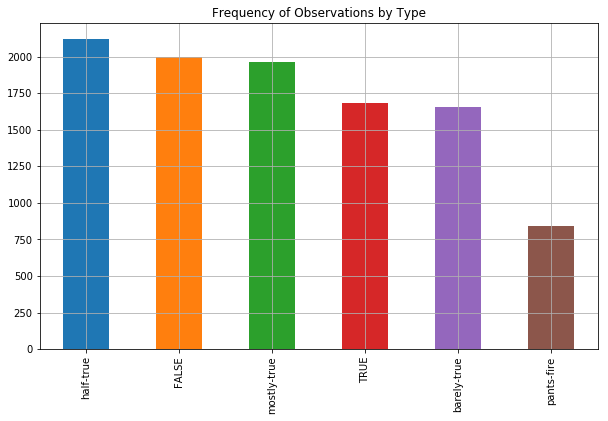

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
data_train.label.value_counts().plot(kind='bar',title = 'Frequency of Observations by Type', grid = True)

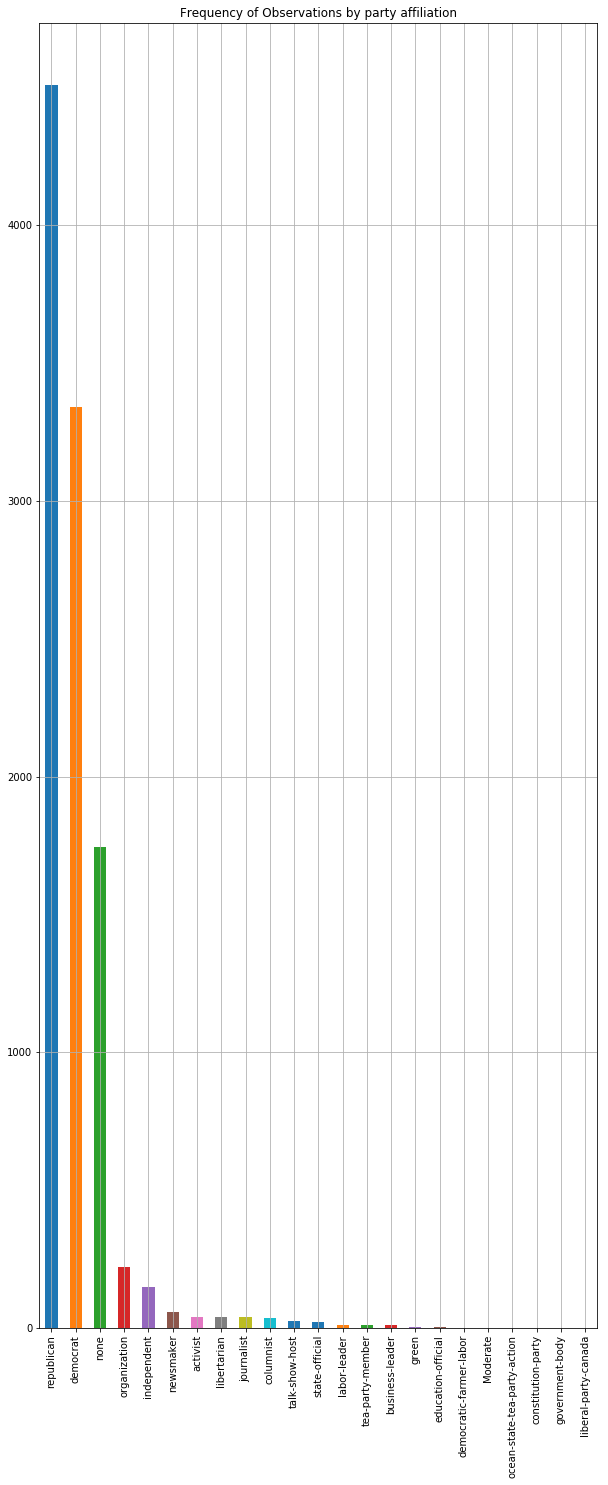

In [72]:
data_train.party_affiliation.unique()
len(data_train.party_affiliation.unique())
plt.figure(figsize=(10,24))
data_train.party_affiliation.value_counts().plot(kind='bar',title = 'Frequency of Observations by party affiliation', grid = True)

In [73]:
data_train.subjects.unique()

array(['abortion', 'energy,history,job-accomplishments', 'foreign-policy',
       ..., 'animals,elections', 'retirement,social-security',
       'florida,foreign-policy'], dtype=object)

In [74]:
len(data_train.subjects.unique())

3837

### Chek the data in the staements column 

In [75]:
from random import *

for i in range(0,10):
    x = randint(0, 100)    # Pick a random number between 1 and 100.
    print (data_train["statement"][x])

Most of the (Affordable Care Act) has already in some sense been waived or otherwise suspended.
In 2008, only 54 percent of Latinos in Texas were registered to vote and only 35 percent actually turned out.
The Chicago Bears have had more starting quarterbacks in the last 10 years than the total number of tenured (UW) faculty fired during the last two decades.
Under Obama, home values in Florida collapsed, construction jobs were lost and the state had a high foreclosure rate.
Said he's the only Republican candidate "who's actually turned around a government economy."
African-American youth unemployment is 51 percent. Hispanic youth unemployment is 36 percent.
Says Paul Ryan is still endorsing Trump.
I'm the only person on this stage who has worked actively just last year passing, along with Russ Feingold, some of the toughest ethics reform since Watergate.
The Florida Department of Agricultures website FreshFromFlorida.com can be used to get a permit to carry a loaded hidden gun without

### Check if there are reoccuring statements in the 'statement' column 

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

cnt_pro = data_train['statement'].value_counts()
print(cnt_pro)

On changing the rules for filibusters on presidential nominees                                                                                                                                                                    3
Some 20,000 Delphi salaried retirees lost up to 70 percent of their pensions as a result of political favoritism and backroom deals.                                                                                              2
Says Mitt Romney flip-flopped on abortion.                                                                                                                                                                                        2
On repealing the 17th Amendment                                                                                                                                                                                                   2
During Sherrod Browns past decade as a D.C. politician, more than one out of every four 

### Tools explored/used for preprocessing : "re" Library, Potter Stemmer, Beautiful Soup, nltk 

### Text Preprocessing Step 1: Converting the 'statement' column to all lower case 

### Text Preprocessing Step 2: Strip all dollar signs,numbers and punctuation (also count them)
### Strip away all other punctuation + Standardize all white space to single space

###  Text Preprocessing Step 3: Remove Stop Words with nltk

Tools for preprocessing:

- re for regular expressions to do Natural Language Processing (NLP)
- stopwords text corpus for removing information-poor words in NLP
- SnowballStemmer for stemming text in NLP
- BeautifulSoup for HTML parsing


In [77]:
import re
from nltk.stem.snowball import SnowballStemmer
from bs4 import BeautifulSoup
import nltk
nltk.download('stopwords')
def preprocess_doc(body):

    # Parse HTML extract content only (but count tags)
    soup = BeautifulSoup(body, 'html.parser')
    body = soup.get_text()
    
    # Pull out only the non-markup tex
    body = soup.get_text()

    # Count the number of HTML elements and specific link elements
    nhtml = len(soup.find_all())
    nlinks = len(soup.find_all("a"))
    # Sub in special strings for "counting"
    body = body + nhtml*" htmltag " + nlinks*" linktag "
    
    # lowercase everything
    body = body.lower()
    
    # Replace all URLs with special strings
    regx = re.compile(r"(http|https)://[^\s]*")
    body, nhttps = regx.subn(repl=" httpaddr ", string=body)

    # Replace all email addresses with special strings
    regx = re.compile(r"\b[^\s]+@[^\s]+[.][^\s]+\b")
    body, nemails = regx.subn(repl=" emailaddr ", string=body)
    
    # Replace all numbers with special strings
    regx = re.compile(r"\b[\d.]+\b")
    body = regx.sub(repl=" number ", string=body)

    # Replace all $, ! and ? with special strings
    regx = re.compile(r"[$]")
    body = regx.sub(repl=" dollar ", string=body)
    regx = re.compile(r"[!]")
    body = regx.sub(repl=" exclammark ", string=body)
    regx = re.compile(r"[?]")
    body = regx.sub(repl=" questmark ", string=body)

    # Remove all other punctuation (replace with white space)
    regx = re.compile(r"([^\w\s]+)|([_-]+)")  
    body = regx.sub(repl=" ", string=body)
    
    # Replace all newlines and blanklines with special strings
    regx = re.compile(r"\n")
    body = regx.sub(repl=" newline ", string=body)
    regx = re.compile(r"\n\n")
    body = regx.sub(repl=" blankline ", string=body)

    # Make all white space a single space
    regx = re.compile(r"\s+")
    body = regx.sub(repl=" ", string=body)

    # Remove any trailing or leading white space
    body = body.strip(" ")
 
    # Remove all useless stopwords
    bodywords = body.split(" ")
    keepwords = [word for word in bodywords if word not in stopwords.words('english')]

    # Stem all words
    stemmer = SnowballStemmer("english")
    stemwords = [stemmer.stem(wd) for wd in keepwords]
    body = " ".join(stemwords)

    return body 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anuks\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [348]:
from nltk.corpus import stopwords
for (index, row) in data_train['statement'].iteritems():
    data_train['bag_of_words'][index] = preprocess_doc(row)
    print(data_train['bag_of_words'][index])

C:\Users\anuks\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\anuks\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


say anni list polit group support third trimest abort demand
declin coal start questmark start natur gas took start begin presid georg w bush administr
hillari clinton agre john mccain vote give georg bush benefit doubt iran
health care reform legisl like mandat free sex chang surgeri
econom turnaround start end term
chicago bear start quarterback last number year total number tenur uw faculti fire last two decad
jim dunnam live district repres year
person stage work activ last year pass along russ feingold toughest ethic reform sinc waterg
howev took dollar number million oregon lotteri fund port newport eventu land new noaa marin oper center pacif
say gop primari oppon glenn grothman joe leibham cast compromis vote cost dollar number million higher electr cost
first time histori share nation popular vote margin smaller latino vote margin
sinc number near number million american slip middl class poverti
mitt romney governor massachusett didnt slow rate growth govern actual cut
economi

economi creat job fastest pace sinc number
presid obama decid meet prime minist benjamin netanyahu new york
major state marri freeli still fire love
say oregon rep peter defazio earl blumenau socialist open serv u number congress
rudi giuliani probabl underqualifi man sinc georg bush seek presid
half presid governor half senat
britain vote leav european union within number hour american lost dollar number billion number k
medicaid spend declin number percent number second declin number year
say number texa constabl die line duti
gov rick scott cut cost prepaid colleg tuition near dollar number number
citi columbus would save dollar number million year employe contribut guarante check pension
florida cfo shut krakow scam refund dollar number million josephin victim con man
women get comput scienc degre 80s factor number plus
air forc want taxpay fund fantasi footbal leagu
barack hussein obama forc court accept islam sharia law domest disput
number percent murder crime commit gun peopl a

high school student arrest campus twice like graduat four time less like graduat theyv appear court
unit state imprison nation world
say marco rubio one open border
number year feder spend educ grown number percent test score remain flat
say cut medicar affect peopl alreadi paid paid
david alameel give thousand dollar support republican parti candid includ john cornyn greg abbott
american healthcar system burn number percent nation gdp nobodi els close
provid port number mile closer europ eastern port
say need photo id purchas sudaf texa
twenti percent hous portland pearl district afford
say allow payrol tax holiday expir would end cost anoth estim number number job number
hillari clinton support nafta perman china trade pennsylvania lost thousand job
numer studi shown call right work law generat job econom growth
obama budget plan would take nation debt number percent gross nation product histor number percent
say hillari clinton said veteran affair scandal exagger said satisfi go
dri

say rais averag famili incom number percent tenur arkansa governor
tri give us dollar number million build high speed train goe number mile hour
say cbo estim fulli extend bush tax cut would add number number number million job number number number number million job number
presid reagan rais debt ceil number time georg w bush seven time
accord david cay johnston averag american pay number percent incom feder tax richest number american pay number percent incom feder tax
young american right theyr cover health insur
number corpor incom tax account number percent feder tax revenu today despit record break profit corpor tax bring less number percent
last number year texa creat number percent net new job nationwid
say two third group target ir scrutini conserv
class number patric lumumba univers moscow mahmoud abba one member class ali khamenei that first establish relationship young vladimir putin
last week texa state board educ sboe led rick perri appointe vote remov thoma jefferson soc

common core feder govern fingerprint thing
social secur inde ponzi scheme
say scott walker brag lot independ agenc investig polic shoot cours didnt fund
arizona law make state crime someth alreadi feder crime
countri found congress exact attitud sanctiti christma celebr number eleven today yeah open
miami dade counti spend school system dollar number million everi year educ recent immigr
omnibus bill dollar number billion earmark
trump propos enact largest tax increas american histori
senat mccain talk tough earmark good earmark account dollar number billion budget
kim myer vote repeat rais tax peopl broom counti made million tax save famili busi reloc headquart
california prop number would requirecondom usein adult film would put worker adult film industri riskfor lawsuit harass
pay among highest toll nation privileg cross bridg
sen isakson chambliss vote unemploy insur vote kill near number number georgia job
say real estat tax put place pay obamacar
say today unemploy run near numbe

KeyboardInterrupt: 

<span style="color:red">Bag of Words - just with text preprocessing</span>

In [30]:
data_train.head(10)

,ID,label,statement,subjects,speaker,speaker's job title,state info,party affiliation,barely true counts,false counts,half true counts,mostly true counts,pants on fire counts,context,bag_of_words
0,2635.json,FALSE,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer,say anni list polit group support third trimes...
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,declin coal start questmark start natur gas to...
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver,hillari clinton agre john mccain vote give geo...
3,1123.json,FALSE,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release,health care reform legisl like mandat free sex...
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN,econom turnaround start end term
5,12465.json,TRUE,The Chicago Bears have had more starting quart...,education,robin-vos,Wisconsin Assembly speaker,Wisconsin,republican,0.0,3.0,2.0,5.0,1.0,a an online opinion-piece,chicago bear start quarterback last number yea...
6,2342.json,barely-true,Jim Dunnam has not lived in the district he re...,candidates-biography,republican-party-texas,NaN,Texas,republican,3.0,1.0,1.0,3.0,1.0,a press release.,jim dunnam live district repres year
7,153.json,half-true,I'm the only person on this stage who has work...,ethics,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,"a Democratic debate in Philadelphia, Pa.",person stage work activ last year pass along r...
8,5602.json,half-true,"However, it took $19.5 million in Oregon Lotte...",jobs,oregon-lottery,NaN,NaN,organization,0.0,0.0,1.0,0.0,1.0,a website,howev took dollar number million oregon lotter...
9,9741.json,mostly-true,Says GOP primary opponents Glenn Grothman and ...,"energy,message-machine-2014,voting-record",duey-stroebel,State representative,Wisconsin,republican,0.0,0.0,0.0,1.0,0.0,an online video,say gop primari oppon glenn grothman joe leibh...


### With the above steps we get the word count for the data under 'statement'

In [31]:
def word_cnt(body):
    nwords = len(body.split(" "))
    return nwords

In [32]:
cnt =0 
for (index, row) in data_train['statement'].iteritems():
    cnt= cnt+word_cnt(row)
    
print("Word Count",cnt)

Word Count 183919


### With the above steps we get the word count for the data under 'bag_of_words'

In [33]:
cnt =0 
for (index, row) in data_train['bag_of_words'].iteritems():
    cnt= cnt+word_cnt(row)
    
print("Word Count",cnt)

Word Count 117464


In [92]:
data_train['bag_of_words']

0        say anni list polit group support third trimes...
1        declin coal start questmark start natur gas to...
2        hillari clinton agre john mccain vote give geo...
3        health care reform legisl like mandat free sex...
4                         econom turnaround start end term
5        chicago bear start quarterback last number yea...
6                     jim dunnam live district repres year
7        person stage work activ last year pass along r...
8        howev took dollar number million oregon lotter...
9        say gop primari oppon glenn grothman joe leibh...
10       first time histori share nation popular vote m...
11       sinc number near number million american slip ...
12       mitt romney governor massachusett didnt slow r...
13       economi bled dollar number billion due govern ...
14       afford care act alreadi sens waiv otherwis sus...
15       last elect novemb number percent american peop...
16       mccain oppos requir govern buy american made m.

### Top 20 most popular word/words from the bag of words


In [110]:
import collections
from collections import Counter
Counter = Counter(data_train['bag_of_words'])
most_occur = Counter.most_common(20)
print(most_occur)

[('abort', 3), ('support gay marriag', 3), ('chang rule filibust presidenti nomine', 3), ('obama say iran tini countri pose serious threat', 2), ('sex marriag', 2), ('tortur', 2), ('four balanc budget row new tax anyon best job growth number year near number number new privat sector job merit pay reward new jersey best teacher educ fund ever', 2), ('sherrod brown past decad number c politician one everi four job left america left ohio sherrod brown horrend ohio job number next year', 2), ('inch away longer free economi', 2), ('six justic u number suprem court confirm presidenti elect year sinc number', 2), ('repeal 17th amend', 2), ('cap trade plan', 2), ('tran pacif partnership', 2), ('barack obama health care plan would leav number million american', 2), ('support export import bank', 2), ('american spend tax number food cloth hous combin', 2), ('status illeg immigr', 2), ('twenti million american work', 2), ('say mitt romney flip flop abort', 2), ('number number delphi salari retire

### Top 10 most popular word/words from the statements field - actual text no preprocessing applied

In [352]:
import collections
from collections import Counter
Counter = Counter(data_train['statement'])
most_occur = Counter.most_common(20)
print(most_occur)

[('On changing the rules for filibusters on presidential nominees', 3), ('On abortion', 2), ("Obama says Iran is a 'tiny' country, 'doesn't pose a serious threat.'", 2), ('On support for gay marriage.', 2), ('On torture.', 2), ('Four balanced budgets in a row, with no new taxes for anyone. The best job growth in 12 years. Nearly 130,000 new private-sector jobs. Merit pay to reward New Jerseys best teachers, and the most education funding ever.', 2), ('During Sherrod Browns past decade as a D.C. politician, more than one out of every four jobs that has left America, left from Ohio. ... Sherrod Brown will own these horrendous Ohio job numbers next year.', 2), ('Six justices on the U.S. Supreme Court have been confirmed in presidential election years since 1912.', 2), ('On repealing the 17th Amendment', 2), ('On a cap-and-trade plan.', 2), ('On the Trans-Pacific Partnership.', 2), ('On support for the Export-Import Bank', 2), ('On the status of illegal immigrants', 2), ('Twenty million Am

<span style="color:red">doc2bow with gensim</span>

In [353]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)

In [354]:
stemmer = SnowballStemmer('english')
original_words = ['political','colonizer','plotted']
singles = [stemmer.stem(plural) for plural in original_words]
pd.DataFrame(data = {'original word': original_words, 'stemmed': singles})

def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result


processed_docs = data_train['statement'].map(preprocess)
processed_docs[:0]
print(processed_docs)

0        [say, anni, list, polit, group, support, trime...
1        [declin, coal, start, start, natur, take, star...
2        [hillari, clinton, agre, john, mccain, vote, g...
3        [health, care, reform, legisl, like, mandat, f...
4                        [econom, turnaround, start, term]
5        [chicago, bear, start, quarterback, year, tota...
6                   [dunnam, live, district, repres, year]
7        [person, stage, work, activ, year, pass, russ,...
8        [take, million, oregon, lotteri, fund, port, n...
9        [say, primari, oppon, glenn, grothman, leibham...
10       [time, histori, share, nation, popular, vote, ...
11       [near, million, american, slip, middl, class, ...
12       [mitt, romney, governor, massachusett, didnt, ...
13             [economi, bleed, billion, govern, shutdown]
14                     [afford, care, sens, waiv, suspend]
15       [elect, novemb, percent, american, peopl, choo...
16       [mccain, oppos, requir, govern, american, moto.

In [355]:
dictionary = gensim.corpora.Dictionary(processed_docs)
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
bow_corpus[4310]

0 abort
1 anni
2 demand
3 group
4 list
5 polit
6 say
7 support
8 trimest
9 administr
10 begin


[(6, 1),
 (27, 1),
 (162, 1),
 (209, 1),
 (492, 1),
 (827, 1),
 (1240, 1),
 (1728, 1),
 (1880, 1),
 (3560, 1),
 (4866, 1),
 (4885, 1),
 (4886, 1)]

## Distillation 

##  1. Topic Modelling 

Topic Modelling is the task of using unsupervised learning to extract the main topics 
(represented as a set of words) that occur in a collection of documents. 

 Topic models are a suite of algorithms/statistical models that uncover the hidden topics in a collection of documents. Given the set of documents would refer to a one or more common topics certain words will appear more or less frequently in the documents 
  Popular topic modeling algorithms include latent semantic analysis (LSA),
     hierarchical Dirichlet process (HDP), and latent Dirichlet allocation (LDA), 
	   - among which LDA has shown great results in practice and therefore been widely adopted.
	   
## LDA  - Latent Dirichlet Allocation

LDA is used to classify text in a document to a particular topic. It builds a topic per document model and words per topic model, modeled as Dirichlet distributions.
 - Each document is modeled as a multinomial distribution of topics and each topic is modeled as a multinomial distribution of words.
 - LDA assumes that every chunk of text we feed into it will contain words that are somehow related. Therefore, choosing the right corpus of data is crucial. 
 - It also assumes documents are produced from a mixture of topics. Those topics then generate words based on their probability distribution
 
## 2. Sentiment Analysis 
 
 To determine the sentiments (True/False/Neutral) associated with each sentence in the topic.

## Below is the workflow followed for distillation -  I used cleaned preprocessed text and applied LDA and sentiment analysis.

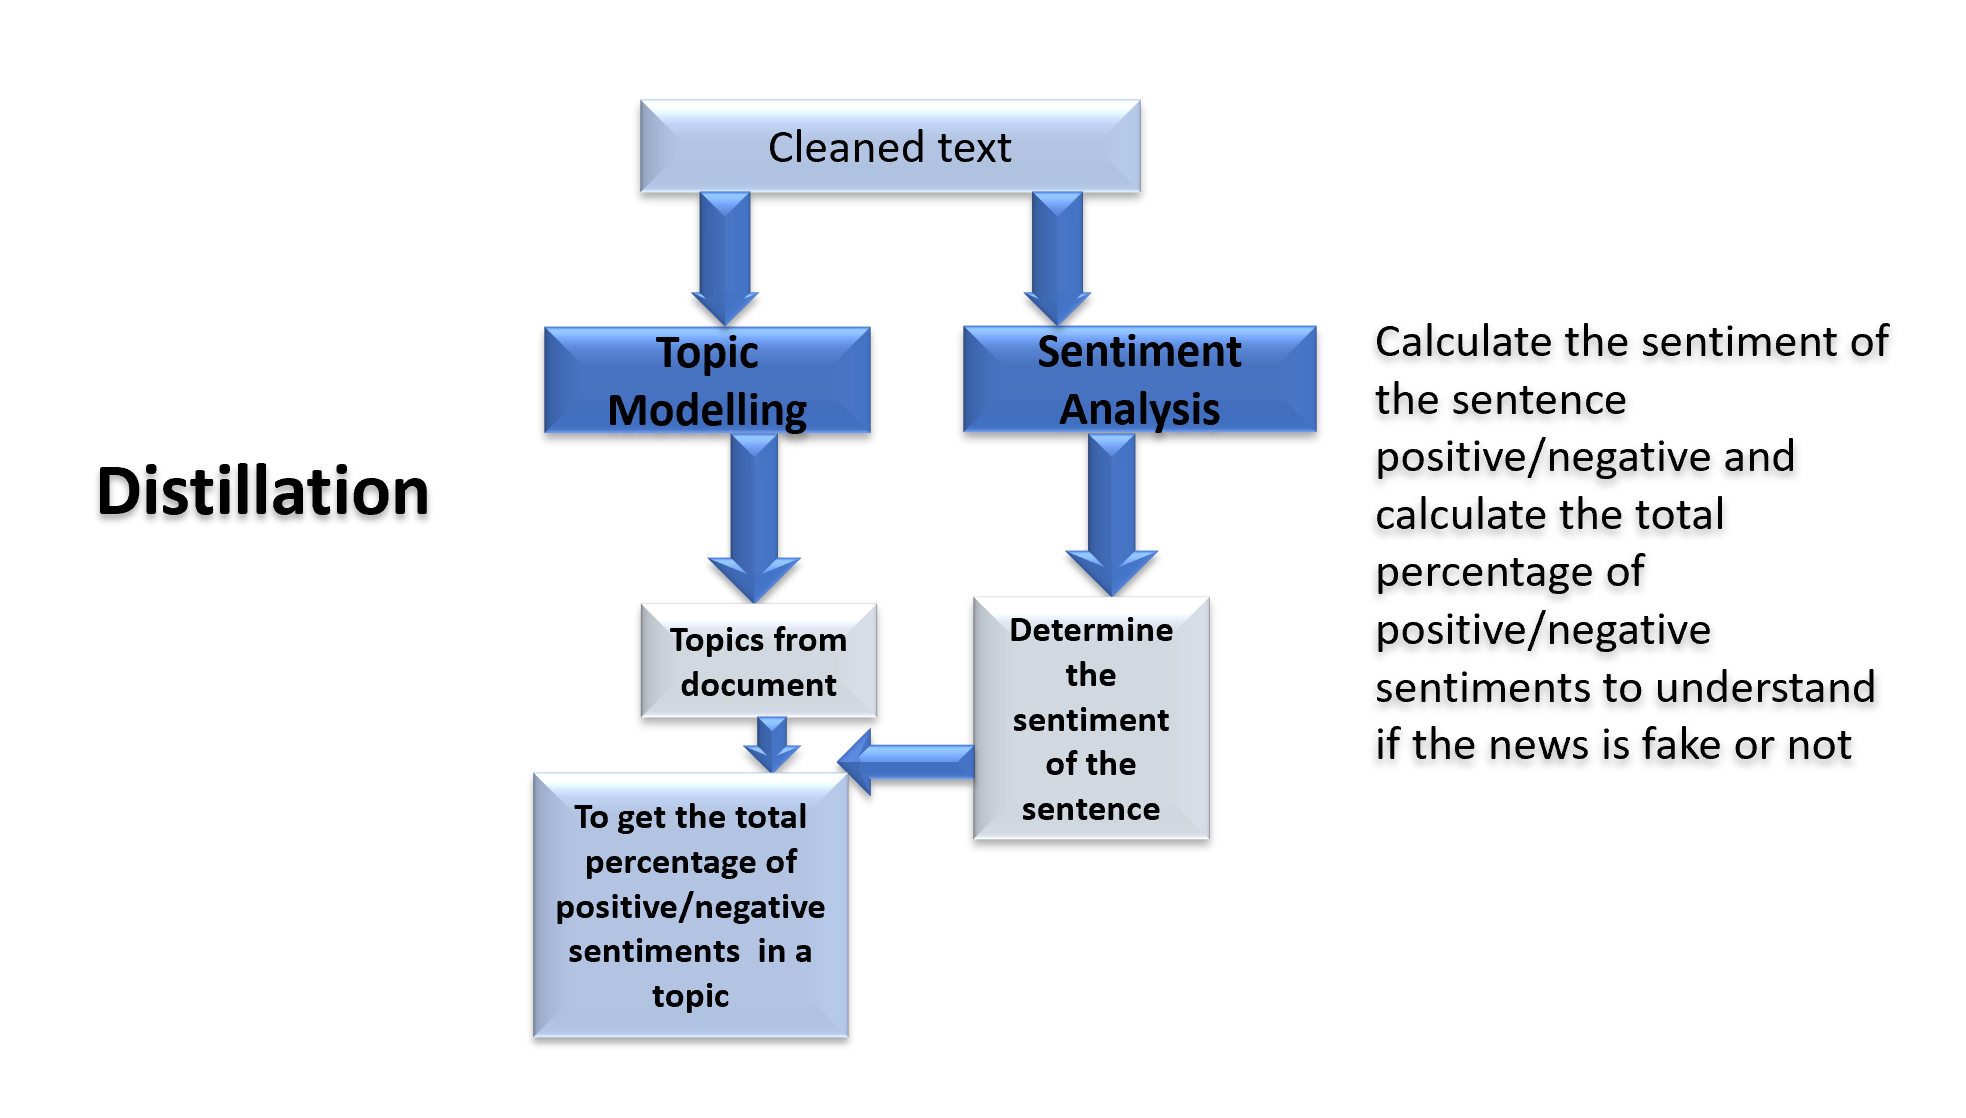

In [137]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=10, id2word=data_train['bag_of_words'], passes=2, workers=2)

In [138]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.090*"director homeland secur cannot use use term terrorist attack instead substitut man made disast" + 0.047*"transgend individu u number number number chanc murder" + 0.013*"say obama promis unemploy would never go number percent" + 0.013*"u number taxpay forc fund feisal abdul rauf trip middl east" + 0.011*"donald trump said nuclear prolifer ok" + 0.010*"barack obama hillari clinton chang rule engag probabl cost capt humayun khan life" + 0.009*"new arizona immigr law say polic offic stop anyon appear reason suspici undocu person" + 0.009*"say rick perri wrote letter support hillarycar" + 0.009*"last elect novemb number percent american peopl chose vote number percent young peopl number percent low incom worker chose vote" + 0.008*"air forc want taxpay fund fantasi footbal leagu"
Topic: 1 
Words: 0.140*"director homeland secur cannot use use term terrorist attack instead substitut man made disast" + 0.023*"barack hussein obama forc court accept islam sharia law dome

In [133]:

num = 100
unseen_document = data_test.statement[num]
print(unseen_document)

Putting three Republicans in my Cabinet...is unprecedented.


In [134]:
# Data preprocessing step for the unseen document
bow_vector = dictionary.doc2bow(preprocess(unseen_document))

for index, score in sorted(lda_model[bow_vector], key=lambda tup: -1*tup[1]):
    print("Score: {}\t Topic: {}".format(score, lda_model.print_topic(index, 10)))

Score: 0.6999776363372803	 Topic: 0.075*"director homeland secur cannot use use term terrorist attack instead substitut man made disast" + 0.016*"transgend individu u number number number chanc murder" + 0.016*"rick perri never lost elect remain person texa governorship three time landslid elect" + 0.010*"cash clunker program got go local junkyard got tow hous go get dollar number number" + 0.010*"new arizona immigr law say polic offic stop anyon appear reason suspici undocu person" + 0.009*"republican small busi tax cut bill spend dollar number million better googl search job creation" + 0.007*"mr caprio career politician never work privat sector" + 0.007*"say man rush stage dayton ohio chatter isi isi social media post" + 0.007*"jim dunnam live district repres year" + 0.006*"redskin train camp deal generat dollar number million new privat invest citi"
Score: 0.033338580280542374	 Topic: 0.133*"director homeland secur cannot use use term terrorist attack instead substitut man made dis

In [149]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=10, id2word=dictionary, passes=2, workers=2)
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.057*"number" + 0.017*"year" + 0.016*"health" + 0.015*"percent" + 0.015*"care" + 0.013*"state" + 0.011*"wisconsin" + 0.008*"scott" + 0.008*"peopl" + 0.008*"obama"
Topic: 1 
Words: 0.084*"number" + 0.025*"percent" + 0.018*"year" + 0.015*"state" + 0.013*"spend" + 0.011*"obama" + 0.011*"dollar" + 0.009*"peopl" + 0.008*"presid" + 0.007*"american"
Topic: 2 
Words: 0.133*"number" + 0.046*"dollar" + 0.019*"percent" + 0.018*"state" + 0.015*"billion" + 0.014*"year" + 0.011*"million" + 0.009*"spend" + 0.006*"everi" + 0.006*"time"
Topic: 3 
Words: 0.093*"number" + 0.019*"dollar" + 0.014*"vote" + 0.012*"percent" + 0.012*"health" + 0.011*"million" + 0.010*"year" + 0.009*"care" + 0.009*"american" + 0.008*"state"
Topic: 4 
Words: 0.027*"number" + 0.020*"state" + 0.012*"obama" + 0.012*"peopl" + 0.011*"trump" + 0.009*"say" + 0.009*"donald" + 0.006*"countri" + 0.006*"unit" + 0.006*"percent"
Topic: 5 
Words: 0.027*"school" + 0.013*"year" + 0.013*"number" + 0.008*"public" + 0.008*"care" 

### Topic Names
0. Elections - Vote percentage for Hillary Clinton
1. Obama's budget expenditure
2. President Obama and the senate
3. Expenditure by state on schools
4. People vote for health care
5. Federal costs for health insurance
6. Unemployment rate and american businesses 
7. President Obama and american healthcare
8. Obama's plans presented to congress 
9. Expenditure by state on health care

### Predicting a topic from the test data 

In [142]:

num = 100
unseen_document = data_test.statement[num]
print(unseen_document)

Putting three Republicans in my Cabinet...is unprecedented.


In [143]:
# Data preprocessing step for the unseen document
bow_vector = dictionary.doc2bow(preprocess(unseen_document))

for index, score in sorted(lda_model[bow_vector], key=lambda tup: -1*tup[1]):
    print("Score: {}\t Topic: {}".format(score, lda_model.print_topic(index, 10)))

Score: 0.6999639868736267	 Topic: 0.060*"number" + 0.017*"vote" + 0.012*"obama" + 0.011*"presid" + 0.010*"senat" + 0.009*"time" + 0.009*"democrat" + 0.008*"dollar" + 0.007*"elect" + 0.007*"state"
Score: 0.03334052488207817	 Topic: 0.076*"number" + 0.014*"percent" + 0.013*"rate" + 0.013*"vote" + 0.012*"state" + 0.011*"clinton" + 0.009*"rai" + 0.009*"year" + 0.008*"dollar" + 0.008*"million"
Score: 0.033339884132146835	 Topic: 0.030*"number" + 0.015*"insur" + 0.013*"health" + 0.012*"year" + 0.009*"obama" + 0.009*"govern" + 0.009*"cost" + 0.008*"feder" + 0.007*"peopl" + 0.007*"everi"
Score: 0.03333950787782669	 Topic: 0.049*"number" + 0.012*"everi" + 0.011*"state" + 0.011*"dollar" + 0.010*"govern" + 0.010*"american" + 0.009*"school" + 0.008*"percent" + 0.008*"care" + 0.008*"time"
Score: 0.033337388187646866	 Topic: 0.034*"number" + 0.029*"obama" + 0.024*"presid" + 0.017*"barack" + 0.012*"nation" + 0.011*"year" + 0.011*"state" + 0.010*"care" + 0.010*"vote" + 0.009*"american"
Score: 0.033337

In [144]:
print(data_test.statement[num])

Putting three Republicans in my Cabinet...is unprecedented.


### Gensim offers a simple way of performing similarity queries using topic models.

In [180]:
from gensim import similarities

lda_index = similarities.MatrixSimilarity(lda_model[bow_corpus])
 
# Let's perform some queries
similarities = lda_index[lda_model[bow_vector]]
# Sort the similarities
similarities = sorted(enumerate(similarities), key=lambda item: -item[1])
 
# Top most similar documents:
print(similarities[:10])

C:\Users\anuks\Anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[(6749, 0.9998994), (6971, 0.99794245), (5241, 0.9946556), (4781, 0.9939091), (10213, 0.9936926), (1110, 0.9917784), (2972, 0.9911544), (3651, 0.99107957), (9876, 0.98949075), (7575, 0.9888695)]


In [161]:
unseen_document = data_test.statement[0]
print(unseen_document)
bow_vector = dictionary.doc2bow(preprocess(unseen_document))
# Let's perform some queries
similarities = lda_index[lda_model[bow_vector]]
# Sort the similarities
similarities = sorted(enumerate(similarities), key=lambda item: -item[1])
 
# Top most similar documents:
print(similarities[:10])

Building a wall on the U.S.-Mexico border will take literally years.
[(6749, 0.9998682), (1350, 0.9984026), (6971, 0.9979301), (5241, 0.9946698), (4781, 0.99392825), (10213, 0.993711), (1110, 0.9917699), (2972, 0.9911854), (3651, 0.9910739), (9876, 0.9895809)]


In [190]:
for idx, topic in lda_model.show_topics(formatted=False, num_words= 30):
     print('Topic: {} \nWords: {}'.format(idx, [w[0] for w in topic]))

Topic: 0 
Words: ['number', 'year', 'health', 'percent', 'care', 'state', 'wisconsin', 'scott', 'peopl', 'obama', 'walker', 'obamacar', 'romney', 'presid', 'governor', 'rate', 'campaign', 'popul', 'dollar', 'mitt', 'want', 'offic', 'govern', 'feder', 'fund', 'say', 'sinc', 'take', 'reform', 'citi']
Topic: 1 
Words: ['number', 'percent', 'year', 'state', 'spend', 'obama', 'dollar', 'peopl', 'presid', 'american', 'support', 'health', 'govern', 'texa', 'increa', 'time', 'care', 'budget', 'school', 'vote', 'educ', 'sinc', 'nation', 'barack', 'million', 'republican', 'governor', 'fund', 'unit', 'propo']
Topic: 2 
Words: ['number', 'dollar', 'percent', 'state', 'billion', 'year', 'million', 'spend', 'everi', 'time', 'plan', 'countri', 'secur', 'cost', 'vote', 'obama', 'feder', 'govern', 'social', 'presid', 'citi', 'republican', 'unit', 'public', 'come', 'work', 'america', 'budget', 'peopl', 'worker']
Topic: 3 
Words: ['number', 'dollar', 'vote', 'percent', 'health', 'million', 'year', 'care'

## 2. Sentiment Analysis 

In [162]:
#AFINN is a list of English words rated for valence with an integer
#between minus five (negative) and plus five (positive). The words have
#been manually labeled by Finn Årup Nielsen in 2009-2011. The file
#is tab-separated.

# Using the AFIN-111 json 

In [163]:
afinn_data = {"abandon":"-2","abandoned":"-2","abandons":"-2","abducted":"-2","abduction":"-2","abductions":"-2","abhor":"-3","abhorred":"-3","abhorrent":"-3","abhors":"-3","abilities":"2","ability":"2","aboard":"1","absentee":"-1","absentees":"-1","absolve":"2","absolved":"2","absolves":"2","absolving":"2","absorbed":"1","abuse":"-3","abused":"-3","abuses":"-3","abusive":"-3","accept":"1","accepted":"1","accepting":"1","accepts":"1","accident":"-2","accidental":"-2","accidentally":"-2","accidents":"-2","accomplish":"2","accomplished":"2","accomplishes":"2","accusation":"-2","accusations":"-2","accuse":"-2","accused":"-2","accuses":"-2","accusing":"-2","ache":"-2","achievable":"1","aching":"-2","acquit":"2","acquits":"2","acquitted":"2","acquitting":"2","acrimonious":"-3","active":"1","adequate":"1","admire":"3","admired":"3","admires":"3","admiring":"3","admit":"-1","admits":"-1","admitted":"-1","admonish":"-2","admonished":"-2","adopt":"1","adopts":"1","adorable":"3","adore":"3","adored":"3","adores":"3","advanced":"1","advantage":"2","advantages":"2","adventure":"2","adventures":"2","adventurous":"2","affected":"-1","affection":"3","affectionate":"3","afflicted":"-1","affronted":"-1","afraid":"-2","aggravate":"-2","aggravated":"-2","aggravates":"-2","aggravating":"-2","aggression":"-2","aggressions":"-2","aggressive":"-2","aghast":"-2","agog":"2","agonise":"-3","agonised":"-3","agonises":"-3","agonising":"-3","agonize":"-3","agonized":"-3","agonizes":"-3","agonizing":"-3","agree":"1","agreeable":"2","agreed":"1","agreement":"1","agrees":"1","alarm":"-2","alarmed":"-2","alarmist":"-2","alarmists":"-2","alas":"-1","alert":"-1","alienation":"-2","alive":"1","allergic":"-2","allow":"1","alone":"-2","amaze":"2","amazed":"2","amazes":"2","amazing":"4","ambitious":"2","ambivalent":"-1","amuse":"3","amused":"3","amusement":"3","amusements":"3","anger":"-3","angers":"-3","angry":"-3","anguish":"-3","anguished":"-3","animosity":"-2","annoy":"-2","annoyance":"-2","annoyed":"-2","annoying":"-2","annoys":"-2","antagonistic":"-2","anti":"-1","anticipation":"1","anxiety":"-2","anxious":"-2","apathetic":"-3","apathy":"-3","apeshit":"-3","apocalyptic":"-2","apologise":"-1","apologised":"-1","apologises":"-1","apologising":"-1","apologize":"-1","apologized":"-1","apologizes":"-1","apologizing":"-1","apology":"-1","appalled":"-2","appalling":"-2","appease":"2","appeased":"2","appeases":"2","appeasing":"2","applaud":"2","applauded":"2","applauding":"2","applauds":"2","applause":"2","appreciate":"2","appreciated":"2","appreciates":"2","appreciating":"2","appreciation":"2","apprehensive":"-2","approval":"2","approved":"2","approves":"2","ardent":"1","arrest":"-2","arrested":"-3","arrests":"-2","arrogant":"-2","ashame":"-2","ashamed":"-2","ass":"-4","assassination":"-3","assassinations":"-3","asset":"2","assets":"2","assfucking":"-4","asshole":"-4","astonished":"2","astound":"3","astounded":"3","astounding":"3","astoundingly":"3","astounds":"3","attack":"-1","attacked":"-1","attacking":"-1","attacks":"-1","attract":"1","attracted":"1","attracting":"2","attraction":"2","attractions":"2","attracts":"1","audacious":"3","authority":"1","avert":"-1","averted":"-1","averts":"-1","avid":"2","avoid":"-1","avoided":"-1","avoids":"-1","await":"-1","awaited":"-1","awaits":"-1","award":"3","awarded":"3","awards":"3","awesome":"4","awful":"-3","awkward":"-2","axe":"-1","axed":"-1","backed":"1","backing":"2","backs":"1","bad":"-3","badass":"-3","badly":"-3","bailout":"-2","bamboozle":"-2","bamboozled":"-2","bamboozles":"-2","ban":"-2","banish":"-1","bankrupt":"-3","bankster":"-3","banned":"-2","bargain":"2","barrier":"-2","bastard":"-5","bastards":"-5","battle":"-1","battles":"-1","beaten":"-2","beatific":"3","beating":"-1","beauties":"3","beautiful":"3","beautifully":"3","beautify":"3","belittle":"-2","belittled":"-2","beloved":"3","benefit":"2","benefits":"2","benefitted":"2","benefitting":"2","bereave":"-2","bereaved":"-2","bereaves":"-2","bereaving":"-2","best":"3","betray":"-3","betrayal":"-3","betrayed":"-3","betraying":"-3","betrays":"-3","better":"2","bias":"-1","biased":"-2","big":"1","bitch":"-5","bitches":"-5","bitter":"-2","bitterly":"-2","bizarre":"-2","blah":"-2","blame":"-2","blamed":"-2","blames":"-2","blaming":"-2","bless":"2","blesses":"2","blessing":"3","blind":"-1","bliss":"3","blissful":"3","blithe":"2","block":"-1","blockbuster":"3","blocked":"-1","blocking":"-1","blocks":"-1","bloody":"-3","blurry":"-2","boastful":"-2","bold":"2","boldly":"2","bomb":"-1","boost":"1","boosted":"1","boosting":"1","boosts":"1","bore":"-2","bored":"-2","boring":"-3","bother":"-2","bothered":"-2","bothers":"-2","bothersome":"-2","boycott":"-2","boycotted":"-2","boycotting":"-2","boycotts":"-2","brainwashing":"-3","brave":"2","breakthrough":"3","breathtaking":"5","bribe":"-3","bright":"1","brightest":"2","brightness":"1","brilliant":"4","brisk":"2","broke":"-1","broken":"-1","brooding":"-2","bullied":"-2","bullshit":"-4","bully":"-2","bullying":"-2","bummer":"-2","buoyant":"2","burden":"-2","burdened":"-2","burdening":"-2","burdens":"-2","calm":"2","calmed":"2","calming":"2","calms":"2","can't stand":"-3","cancel":"-1","cancelled":"-1","cancelling":"-1","cancels":"-1","cancer":"-1","capable":"1","captivated":"3","care":"2","carefree":"1","careful":"2","carefully":"2","careless":"-2","cares":"2","cashing in":"-2","casualty":"-2","catastrophe":"-3","catastrophic":"-4","cautious":"-1","celebrate":"3","celebrated":"3","celebrates":"3","celebrating":"3","censor":"-2","censored":"-2","censors":"-2","certain":"1","chagrin":"-2","chagrined":"-2","challenge":"-1","chance":"2","chances":"2","chaos":"-2","chaotic":"-2","charged":"-3","charges":"-2","charm":"3","charming":"3","charmless":"-3","chastise":"-3","chastised":"-3","chastises":"-3","chastising":"-3","cheat":"-3","cheated":"-3","cheater":"-3","cheaters":"-3","cheats":"-3","cheer":"2","cheered":"2","cheerful":"2","cheering":"2","cheerless":"-2","cheers":"2","cheery":"3","cherish":"2","cherished":"2","cherishes":"2","cherishing":"2","chic":"2","childish":"-2","chilling":"-1","choke":"-2","choked":"-2","chokes":"-2","choking":"-2","clarifies":"2","clarity":"2","clash":"-2","classy":"3","clean":"2","cleaner":"2","clear":"1","cleared":"1","clearly":"1","clears":"1","clever":"2","clouded":"-1","clueless":"-2","cock":"-5","cocksucker":"-5","cocksuckers":"-5","cocky":"-2","coerced":"-2","collapse":"-2","collapsed":"-2","collapses":"-2","collapsing":"-2","collide":"-1","collides":"-1","colliding":"-1","collision":"-2","collisions":"-2","colluding":"-3","combat":"-1","combats":"-1","comedy":"1","comfort":"2","comfortable":"2","comforting":"2","comforts":"2","commend":"2","commended":"2","commit":"1","commitment":"2","commits":"1","committed":"1","committing":"1","compassionate":"2","compelled":"1","competent":"2","competitive":"2","complacent":"-2","complain":"-2","complained":"-2","complains":"-2","comprehensive":"2","conciliate":"2","conciliated":"2","conciliates":"2","conciliating":"2","condemn":"-2","condemnation":"-2","condemned":"-2","condemns":"-2","confidence":"2","confident":"2","conflict":"-2","conflicting":"-2","conflictive":"-2","conflicts":"-2","confuse":"-2","confused":"-2","confusing":"-2","congrats":"2","congratulate":"2","congratulation":"2","congratulations":"2","consent":"2","consents":"2","consolable":"2","conspiracy":"-3","constrained":"-2","contagion":"-2","contagions":"-2","contagious":"-1","contempt":"-2","contemptuous":"-2","contemptuously":"-2","contend":"-1","contender":"-1","contending":"-1","contentious":"-2","contestable":"-2","controversial":"-2","controversially":"-2","convince":"1","convinced":"1","convinces":"1","convivial":"2","cool":"1","cool stuff":"3","cornered":"-2","corpse":"-1","costly":"-2","courage":"2","courageous":"2","courteous":"2","courtesy":"2","cover-up":"-3","coward":"-2","cowardly":"-2","coziness":"2","cramp":"-1","crap":"-3","crash":"-2","crazier":"-2","craziest":"-2","crazy":"-2","creative":"2","crestfallen":"-2","cried":"-2","cries":"-2","crime":"-3","criminal":"-3","criminals":"-3","crisis":"-3","critic":"-2","criticism":"-2","criticize":"-2","criticized":"-2","criticizes":"-2","criticizing":"-2","critics":"-2","cruel":"-3","cruelty":"-3","crush":"-1","crushed":"-2","crushes":"-1","crushing":"-1","cry":"-1","crying":"-2","cunt":"-5","curious":"1","curse":"-1","cut":"-1","cute":"2","cuts":"-1","cutting":"-1","cynic":"-2","cynical":"-2","cynicism":"-2","damage":"-3","damages":"-3","damn":"-4","damned":"-4","damnit":"-4","danger":"-2","daredevil":"2","daring":"2","darkest":"-2","darkness":"-1","dauntless":"2","dead":"-3","deadlock":"-2","deafening":"-1","dear":"2","dearly":"3","death":"-2","debonair":"2","debt":"-2","deceit":"-3","deceitful":"-3","deceive":"-3","deceived":"-3","deceives":"-3","deceiving":"-3","deception":"-3","decisive":"1","dedicated":"2","defeated":"-2","defect":"-3","defects":"-3","defender":"2","defenders":"2","defenseless":"-2","defer":"-1","deferring":"-1","defiant":"-1","deficit":"-2","degrade":"-2","degraded":"-2","degrades":"-2","dehumanize":"-2","dehumanized":"-2","dehumanizes":"-2","dehumanizing":"-2","deject":"-2","dejected":"-2","dejecting":"-2","dejects":"-2","delay":"-1","delayed":"-1","delight":"3","delighted":"3","delighting":"3","delights":"3","demand":"-1","demanded":"-1","demanding":"-1","demands":"-1","demonstration":"-1","demoralized":"-2","denied":"-2","denier":"-2","deniers":"-2","denies":"-2","denounce":"-2","denounces":"-2","deny":"-2","denying":"-2","depressed":"-2","depressing":"-2","derail":"-2","derailed":"-2","derails":"-2","deride":"-2","derided":"-2","derides":"-2","deriding":"-2","derision":"-2","desirable":"2","desire":"1","desired":"2","desirous":"2","despair":"-3","despairing":"-3","despairs":"-3","desperate":"-3","desperately":"-3","despondent":"-3","destroy":"-3","destroyed":"-3","destroying":"-3","destroys":"-3","destruction":"-3","destructive":"-3","detached":"-1","detain":"-2","detained":"-2","detention":"-2","determined":"2","devastate":"-2","devastated":"-2","devastating":"-2","devoted":"3","diamond":"1","dick":"-4","dickhead":"-4","die":"-3","died":"-3","difficult":"-1","diffident":"-2","dilemma":"-1","dipshit":"-3","dire":"-3","direful":"-3","dirt":"-2","dirtier":"-2","dirtiest":"-2","dirty":"-2","disabling":"-1","disadvantage":"-2","disadvantaged":"-2","disappear":"-1","disappeared":"-1","disappears":"-1","disappoint":"-2","disappointed":"-2","disappointing":"-2","disappointment":"-2","disappointments":"-2","disappoints":"-2","disaster":"-2","disasters":"-2","disastrous":"-3","disbelieve":"-2","discard":"-1","discarded":"-1","discarding":"-1","discards":"-1","disconsolate":"-2","disconsolation":"-2","discontented":"-2","discord":"-2","discounted":"-1","discouraged":"-2","discredited":"-2","disdain":"-2","disgrace":"-2","disgraced":"-2","disguise":"-1","disguised":"-1","disguises":"-1","disguising":"-1","disgust":"-3","disgusted":"-3","disgusting":"-3","disheartened":"-2","dishonest":"-2","disillusioned":"-2","disinclined":"-2","disjointed":"-2","dislike":"-2","dismal":"-2","dismayed":"-2","disorder":"-2","disorganized":"-2","disoriented":"-2","disparage":"-2","disparaged":"-2","disparages":"-2","disparaging":"-2","displeased":"-2","dispute":"-2","disputed":"-2","disputes":"-2","disputing":"-2","disqualified":"-2","disquiet":"-2","disregard":"-2","disregarded":"-2","disregarding":"-2","disregards":"-2","disrespect":"-2","disrespected":"-2","disruption":"-2","disruptions":"-2","disruptive":"-2","dissatisfied":"-2","distort":"-2","distorted":"-2","distorting":"-2","distorts":"-2","distract":"-2","distracted":"-2","distraction":"-2","distracts":"-2","distress":"-2","distressed":"-2","distresses":"-2","distressing":"-2","distrust":"-3","distrustful":"-3","disturb":"-2","disturbed":"-2","disturbing":"-2","disturbs":"-2","dithering":"-2","dizzy":"-1","dodging":"-2","dodgy":"-2","does not work":"-3","dolorous":"-2","dont like":"-2","doom":"-2","doomed":"-2","doubt":"-1","doubted":"-1","doubtful":"-1","doubting":"-1","doubts":"-1","douche":"-3","douchebag":"-3","downcast":"-2","downhearted":"-2","downside":"-2","drag":"-1","dragged":"-1","drags":"-1","drained":"-2","dread":"-2","dreaded":"-2","dreadful":"-3","dreading":"-2","dream":"1","dreams":"1","dreary":"-2","droopy":"-2","drop":"-1","drown":"-2","drowned":"-2","drowns":"-2","drunk":"-2","dubious":"-2","dud":"-2","dull":"-2","dumb":"-3","dumbass":"-3","dump":"-1","dumped":"-2","dumps":"-1","dupe":"-2","duped":"-2","dysfunction":"-2","eager":"2","earnest":"2","ease":"2","easy":"1","ecstatic":"4","eerie":"-2","eery":"-2","effective":"2","effectively":"2","elated":"3","elation":"3","elegant":"2","elegantly":"2","embarrass":"-2","embarrassed":"-2","embarrasses":"-2","embarrassing":"-2","embarrassment":"-2","embittered":"-2","embrace":"1","emergency":"-2","empathetic":"2","emptiness":"-1","empty":"-1","enchanted":"2","encourage":"2","encouraged":"2","encouragement":"2","encourages":"2","endorse":"2","endorsed":"2","endorsement":"2","endorses":"2","enemies":"-2","enemy":"-2","energetic":"2","engage":"1","engages":"1","engrossed":"1","enjoy":"2","enjoying":"2","enjoys":"2","enlighten":"2","enlightened":"2","enlightening":"2","enlightens":"2","ennui":"-2","enrage":"-2","enraged":"-2","enrages":"-2","enraging":"-2","enrapture":"3","enslave":"-2","enslaved":"-2","enslaves":"-2","ensure":"1","ensuring":"1","enterprising":"1","entertaining":"2","enthral":"3","enthusiastic":"3","entitled":"1","entrusted":"2","envies":"-1","envious":"-2","envy":"-1","envying":"-1","erroneous":"-2","error":"-2","errors":"-2","escape":"-1","escapes":"-1","escaping":"-1","esteemed":"2","ethical":"2","euphoria":"3","euphoric":"4","eviction":"-1","evil":"-3","exaggerate":"-2","exaggerated":"-2","exaggerates":"-2","exaggerating":"-2","exasperated":"2","excellence":"3","excellent":"3","excite":"3","excited":"3","excitement":"3","exciting":"3","exclude":"-1","excluded":"-2","exclusion":"-1","exclusive":"2","excuse":"-1","exempt":"-1","exhausted":"-2","exhilarated":"3","exhilarates":"3","exhilarating":"3","exonerate":"2","exonerated":"2","exonerates":"2","exonerating":"2","expand":"1","expands":"1","expel":"-2","expelled":"-2","expelling":"-2","expels":"-2","exploit":"-2","exploited":"-2","exploiting":"-2","exploits":"-2","exploration":"1","explorations":"1","expose":"-1","exposed":"-1","exposes":"-1","exposing":"-1","extend":"1","extends":"1","exuberant":"4","exultant":"3","exultantly":"3","fabulous":"4","fad":"-2","fag":"-3","faggot":"-3","faggots":"-3","fail":"-2","failed":"-2","failing":"-2","fails":"-2","failure":"-2","failures":"-2","fainthearted":"-2","fair":"2","faith":"1","faithful":"3","fake":"-3","fakes":"-3","faking":"-3","fallen":"-2","falling":"-1","falsified":"-3","falsify":"-3","fame":"1","fan":"3","fantastic":"4","farce":"-1","fascinate":"3","fascinated":"3","fascinates":"3","fascinating":"3","fascist":"-2","fascists":"-2","fatalities":"-3","fatality":"-3","fatigue":"-2","fatigued":"-2","fatigues":"-2","fatiguing":"-2","favor":"2","favored":"2","favorite":"2","favorited":"2","favorites":"2","favors":"2","fear":"-2","fearful":"-2","fearing":"-2","fearless":"2","fearsome":"-2","fed up":"-3","feeble":"-2","feeling":"1","felonies":"-3","felony":"-3","fervent":"2","fervid":"2","festive":"2","fiasco":"-3","fidgety":"-2","fight":"-1","fine":"2","fire":"-2","fired":"-2","firing":"-2","fit":"1","fitness":"1","flagship":"2","flees":"-1","flop":"-2","flops":"-2","flu":"-2","flustered":"-2","focused":"2","fond":"2","fondness":"2","fool":"-2","foolish":"-2","fools":"-2","forced":"-1","foreclosure":"-2","foreclosures":"-2","forget":"-1","forgetful":"-2","forgive":"1","forgiving":"1","forgotten":"-1","fortunate":"2","frantic":"-1","fraud":"-4","frauds":"-4","fraudster":"-4","fraudsters":"-4","fraudulence":"-4","fraudulent":"-4","free":"1","freedom":"2","frenzy":"-3","fresh":"1","friendly":"2","fright":"-2","frightened":"-2","frightening":"-3","frikin":"-2","frisky":"2","frowning":"-1","frustrate":"-2","frustrated":"-2","frustrates":"-2","frustrating":"-2","frustration":"-2","ftw":"3","fuck":"-4","fucked":"-4","fucker":"-4","fuckers":"-4","fuckface":"-4","fuckhead":"-4","fucking":"-4","fucktard":"-4","fud":"-3","fuked":"-4","fuking":"-4","fulfill":"2","fulfilled":"2","fulfills":"2","fuming":"-2","fun":"4","funeral":"-1","funerals":"-1","funky":"2","funnier":"4","funny":"4","furious":"-3","futile":"2","gag":"-2","gagged":"-2","gain":"2","gained":"2","gaining":"2","gains":"2","gallant":"3","gallantly":"3","gallantry":"3","generous":"2","genial":"3","ghost":"-1","giddy":"-2","gift":"2","glad":"3","glamorous":"3","glamourous":"3","glee":"3","gleeful":"3","gloom":"-1","gloomy":"-2","glorious":"2","glory":"2","glum":"-2","god":"1","goddamn":"-3","godsend":"4","good":"3","goodness":"3","grace":"1","gracious":"3","grand":"3","grant":"1","granted":"1","granting":"1","grants":"1","grateful":"3","gratification":"2","grave":"-2","gray":"-1","great":"3","greater":"3","greatest":"3","greed":"-3","greedy":"-2","green wash":"-3","green washing":"-3","greenwash":"-3","greenwasher":"-3","greenwashers":"-3","greenwashing":"-3","greet":"1","greeted":"1","greeting":"1","greetings":"2","greets":"1","grey":"-1","grief":"-2","grieved":"-2","gross":"-2","growing":"1","growth":"2","guarantee":"1","guilt":"-3","guilty":"-3","gullibility":"-2","gullible":"-2","gun":"-1","ha":"2","hacked":"-1","haha":"3","hahaha":"3","hahahah":"3","hail":"2","hailed":"2","hapless":"-2","haplessness":"-2","happiness":"3","happy":"3","hard":"-1","hardier":"2","hardship":"-2","hardy":"2","harm":"-2","harmed":"-2","harmful":"-2","harming":"-2","harms":"-2","harried":"-2","harsh":"-2","harsher":"-2","harshest":"-2","hate":"-3","hated":"-3","haters":"-3","hates":"-3","hating":"-3","haunt":"-1","haunted":"-2","haunting":"1","haunts":"-1","havoc":"-2","healthy":"2","heartbreaking":"-3","heartbroken":"-3","heartfelt":"3","heaven":"2","heavenly":"4","heavyhearted":"-2","hell":"-4","help":"2","helpful":"2","helping":"2","helpless":"-2","helps":"2","hero":"2","heroes":"2","heroic":"3","hesitant":"-2","hesitate":"-2","hid":"-1","hide":"-1","hides":"-1","hiding":"-1","highlight":"2","hilarious":"2","hindrance":"-2","hoax":"-2","homesick":"-2","honest":"2","honor":"2","honored":"2","honoring":"2","honour":"2","honoured":"2","honouring":"2","hooligan":"-2","hooliganism":"-2","hooligans":"-2","hope":"2","hopeful":"2","hopefully":"2","hopeless":"-2","hopelessness":"-2","hopes":"2","hoping":"2","horrendous":"-3","horrible":"-3","horrific":"-3","horrified":"-3","hostile":"-2","huckster":"-2","hug":"2","huge":"1","hugs":"2","humerous":"3","humiliated":"-3","humiliation":"-3","humor":"2","humorous":"2","humour":"2","humourous":"2","hunger":"-2","hurrah":"5","hurt":"-2","hurting":"-2","hurts":"-2","hypocritical":"-2","hysteria":"-3","hysterical":"-3","hysterics":"-3","idiot":"-3","idiotic":"-3","ignorance":"-2","ignorant":"-2","ignore":"-1","ignored":"-2","ignores":"-1","ill":"-2","illegal":"-3","illiteracy":"-2","illness":"-2","illnesses":"-2","imbecile":"-3","immobilized":"-1","immortal":"2","immune":"1","impatient":"-2","imperfect":"-2","importance":"2","important":"2","impose":"-1","imposed":"-1","imposes":"-1","imposing":"-1","impotent":"-2","impress":"3","impressed":"3","impresses":"3","impressive":"3","imprisoned":"-2","improve":"2","improved":"2","improvement":"2","improves":"2","improving":"2","inability":"-2","inaction":"-2","inadequate":"-2","incapable":"-2","incapacitated":"-2","incensed":"-2","incompetence":"-2","incompetent":"-2","inconsiderate":"-2","inconvenience":"-2","inconvenient":"-2","increase":"1","increased":"1","indecisive":"-2","indestructible":"2","indifference":"-2","indifferent":"-2","indignant":"-2","indignation":"-2","indoctrinate":"-2","indoctrinated":"-2","indoctrinates":"-2","indoctrinating":"-2","ineffective":"-2","ineffectively":"-2","infatuated":"2","infatuation":"2","infected":"-2","inferior":"-2","inflamed":"-2","influential":"2","infringement":"-2","infuriate":"-2","infuriated":"-2","infuriates":"-2","infuriating":"-2","inhibit":"-1","injured":"-2","injury":"-2","injustice":"-2","innovate":"1","innovates":"1","innovation":"1","innovative":"2","inquisition":"-2","inquisitive":"2","insane":"-2","insanity":"-2","insecure":"-2","insensitive":"-2","insensitivity":"-2","insignificant":"-2","insipid":"-2","inspiration":"2","inspirational":"2","inspire":"2","inspired":"2","inspires":"2","inspiring":"3","insult":"-2","insulted":"-2","insulting":"-2","insults":"-2","intact":"2","integrity":"2","intelligent":"2","intense":"1","interest":"1","interested":"2","interesting":"2","interests":"1","interrogated":"-2","interrupt":"-2","interrupted":"-2","interrupting":"-2","interruption":"-2","interrupts":"-2","intimidate":"-2","intimidated":"-2","intimidates":"-2","intimidating":"-2","intimidation":"-2","intricate":"2","intrigues":"1","invincible":"2","invite":"1","inviting":"1","invulnerable":"2","irate":"-3","ironic":"-1","irony":"-1","irrational":"-1","irresistible":"2","irresolute":"-2","irresponsible":"2","irreversible":"-1","irritate":"-3","irritated":"-3","irritating":"-3","isolated":"-1","itchy":"-2","jackass":"-4","jackasses":"-4","jailed":"-2","jaunty":"2","jealous":"-2","jeopardy":"-2","jerk":"-3","jesus":"1","jewel":"1","jewels":"1","jocular":"2","join":"1","joke":"2","jokes":"2","jolly":"2","jovial":"2","joy":"3","joyful":"3","joyfully":"3","joyless":"-2","joyous":"3","jubilant":"3","jumpy":"-1","justice":"2","justifiably":"2","justified":"2","keen":"1","kill":"-3","killed":"-3","killing":"-3","kills":"-3","kind":"2","kinder":"2","kiss":"2","kudos":"3","lack":"-2","lackadaisical":"-2","lag":"-1","lagged":"-2","lagging":"-2","lags":"-2","lame":"-2","landmark":"2","laugh":"1","laughed":"1","laughing":"1","laughs":"1","laughting":"1","launched":"1","lawl":"3","lawsuit":"-2","lawsuits":"-2","lazy":"-1","leak":"-1","leaked":"-1","leave":"-1","legal":"1","legally":"1","lenient":"1","lethargic":"-2","lethargy":"-2","liar":"-3","liars":"-3","libelous":"-2","lied":"-2","lifesaver":"4","lighthearted":"1","like":"2","liked":"2","likes":"2","limitation":"-1","limited":"-1","limits":"-1","litigation":"-1","litigious":"-2","lively":"2","livid":"-2","lmao":"4","lmfao":"4","loathe":"-3","loathed":"-3","loathes":"-3","loathing":"-3","lobby":"-2","lobbying":"-2","lol":"3","lonely":"-2","lonesome":"-2","longing":"-1","loom":"-1","loomed":"-1","looming":"-1","looms":"-1","loose":"-3","looses":"-3","loser":"-3","losing":"-3","loss":"-3","lost":"-3","lovable":"3","love":"3","loved":"3","lovelies":"3","lovely":"3","loving":"2","lowest":"-1","loyal":"3","loyalty":"3","luck":"3","luckily":"3","lucky":"3","lugubrious":"-2","lunatic":"-3","lunatics":"-3","lurk":"-1","lurking":"-1","lurks":"-1","mad":"-3","maddening":"-3","made-up":"-1","madly":"-3","madness":"-3","mandatory":"-1","manipulated":"-1","manipulating":"-1","manipulation":"-1","marvel":"3","marvelous":"3","marvels":"3","masterpiece":"4","masterpieces":"4","matter":"1","matters":"1","mature":"2","meaningful":"2","meaningless":"-2","medal":"3","mediocrity":"-3","meditative":"1","melancholy":"-2","menace":"-2","menaced":"-2","mercy":"2","merry":"3","mess":"-2","messed":"-2","messing up":"-2","methodical":"2","mindless":"-2","miracle":"4","mirth":"3","mirthful":"3","mirthfully":"3","misbehave":"-2","misbehaved":"-2","misbehaves":"-2","misbehaving":"-2","mischief":"-1","mischiefs":"-1","miserable":"-3","misery":"-2","misgiving":"-2","misinformation":"-2","misinformed":"-2","misinterpreted":"-2","misleading":"-3","misread":"-1","misreporting":"-2","misrepresentation":"-2","miss":"-2","missed":"-2","missing":"-2","mistake":"-2","mistaken":"-2","mistakes":"-2","mistaking":"-2","misunderstand":"-2","misunderstanding":"-2","misunderstands":"-2","misunderstood":"-2","moan":"-2","moaned":"-2","moaning":"-2","moans":"-2","mock":"-2","mocked":"-2","mocking":"-2","mocks":"-2","mongering":"-2","monopolize":"-2","monopolized":"-2","monopolizes":"-2","monopolizing":"-2","moody":"-1","mope":"-1","moping":"-1","moron":"-3","motherfucker":"-5","motherfucking":"-5","motivate":"1","motivated":"2","motivating":"2","motivation":"1","mourn":"-2","mourned":"-2","mournful":"-2","mourning":"-2","mourns":"-2","mumpish":"-2","murder":"-2","murderer":"-2","murdering":"-3","murderous":"-3","murders":"-2","myth":"-1","n00b":"-2","naive":"-2","nasty":"-3","natural":"1","naïve":"-2","needy":"-2","negative":"-2","negativity":"-2","neglect":"-2","neglected":"-2","neglecting":"-2","neglects":"-2","nerves":"-1","nervous":"-2","nervously":"-2","nice":"3","nifty":"2","niggas":"-5","nigger":"-5","no":"-1","no fun":"-3","noble":"2","noisy":"-1","nonsense":"-2","noob":"-2","nosey":"-2","not good":"-2","not working":"-3","notorious":"-2","novel":"2","numb":"-1","nuts":"-3","obliterate":"-2","obliterated":"-2","obnoxious":"-3","obscene":"-2","obsessed":"2","obsolete":"-2","obstacle":"-2","obstacles":"-2","obstinate":"-2","odd":"-2","offend":"-2","offended":"-2","offender":"-2","offending":"-2","offends":"-2","offline":"-1","oks":"2","ominous":"3","once-in-a-lifetime":"3","opportunities":"2","opportunity":"2","oppressed":"-2","oppressive":"-2","optimism":"2","optimistic":"2","optionless":"-2","outcry":"-2","outmaneuvered":"-2","outrage":"-3","outraged":"-3","outreach":"2","outstanding":"5","overjoyed":"4","overload":"-1","overlooked":"-1","overreact":"-2","overreacted":"-2","overreaction":"-2","overreacts":"-2","oversell":"-2","overselling":"-2","oversells":"-2","oversimplification":"-2","oversimplified":"-2","oversimplifies":"-2","oversimplify":"-2","overstatement":"-2","overstatements":"-2","overweight":"-1","oxymoron":"-1","pain":"-2","pained":"-2","panic":"-3","panicked":"-3","panics":"-3","paradise":"3","paradox":"-1","pardon":"2","pardoned":"2","pardoning":"2","pardons":"2","parley":"-1","passionate":"2","passive":"-1","passively":"-1","pathetic":"-2","pay":"-1","peace":"2","peaceful":"2","peacefully":"2","penalty":"-2","pensive":"-1","perfect":"3","perfected":"2","perfectly":"3","perfects":"2","peril":"-2","perjury":"-3","perpetrator":"-2","perpetrators":"-2","perplexed":"-2","persecute":"-2","persecuted":"-2","persecutes":"-2","persecuting":"-2","perturbed":"-2","pesky":"-2","pessimism":"-2","pessimistic":"-2","petrified":"-2","phobic":"-2","picturesque":"2","pileup":"-1","pique":"-2","piqued":"-2","piss":"-4","pissed":"-4","pissing":"-3","piteous":"-2","pitied":"-1","pity":"-2","playful":"2","pleasant":"3","please":"1","pleased":"3","pleasure":"3","poised":"-2","poison":"-2","poisoned":"-2","poisons":"-2","pollute":"-2","polluted":"-2","polluter":"-2","polluters":"-2","pollutes":"-2","poor":"-2","poorer":"-2","poorest":"-2","popular":"3","positive":"2","positively":"2","possessive":"-2","postpone":"-1","postponed":"-1","postpones":"-1","postponing":"-1","poverty":"-1","powerful":"2","powerless":"-2","praise":"3","praised":"3","praises":"3","praising":"3","pray":"1","praying":"1","prays":"1","prblm":"-2","prblms":"-2","prepared":"1","pressure":"-1","pressured":"-2","pretend":"-1","pretending":"-1","pretends":"-1","pretty":"1","prevent":"-1","prevented":"-1","preventing":"-1","prevents":"-1","prick":"-5","prison":"-2","prisoner":"-2","prisoners":"-2","privileged":"2","proactive":"2","problem":"-2","problems":"-2","profiteer":"-2","progress":"2","prominent":"2","promise":"1","promised":"1","promises":"1","promote":"1","promoted":"1","promotes":"1","promoting":"1","propaganda":"-2","prosecute":"-1","prosecuted":"-2","prosecutes":"-1","prosecution":"-1","prospect":"1","prospects":"1","prosperous":"3","protect":"1","protected":"1","protects":"1","protest":"-2","protesters":"-2","protesting":"-2","protests":"-2","proud":"2","proudly":"2","provoke":"-1","provoked":"-1","provokes":"-1","provoking":"-1","pseudoscience":"-3","punish":"-2","punished":"-2","punishes":"-2","punitive":"-2","pushy":"-1","puzzled":"-2","quaking":"-2","questionable":"-2","questioned":"-1","questioning":"-1","racism":"-3","racist":"-3","racists":"-3","rage":"-2","rageful":"-2","rainy":"-1","rant":"-3","ranter":"-3","ranters":"-3","rants":"-3","rape":"-4","rapist":"-4","rapture":"2","raptured":"2","raptures":"2","rapturous":"4","rash":"-2","ratified":"2","reach":"1","reached":"1","reaches":"1","reaching":"1","reassure":"1","reassured":"1","reassures":"1","reassuring":"2","rebellion":"-2","recession":"-2","reckless":"-2","recommend":"2","recommended":"2","recommends":"2","redeemed":"2","refuse":"-2","refused":"-2","refusing":"-2","regret":"-2","regretful":"-2","regrets":"-2","regretted":"-2","regretting":"-2","reject":"-1","rejected":"-1","rejecting":"-1","rejects":"-1","rejoice":"4","rejoiced":"4","rejoices":"4","rejoicing":"4","relaxed":"2","relentless":"-1","reliant":"2","relieve":"1","relieved":"2","relieves":"1","relieving":"2","relishing":"2","remarkable":"2","remorse":"-2","repulse":"-1","repulsed":"-2","rescue":"2","rescued":"2","rescues":"2","resentful":"-2","resign":"-1","resigned":"-1","resigning":"-1","resigns":"-1","resolute":"2","resolve":"2","resolved":"2","resolves":"2","resolving":"2","respected":"2","responsible":"2","responsive":"2","restful":"2","restless":"-2","restore":"1","restored":"1","restores":"1","restoring":"1","restrict":"-2","restricted":"-2","restricting":"-2","restriction":"-2","restricts":"-2","retained":"-1","retard":"-2","retarded":"-2","retreat":"-1","revenge":"-2","revengeful":"-2","revered":"2","revive":"2","revives":"2","reward":"2","rewarded":"2","rewarding":"2","rewards":"2","rich":"2","ridiculous":"-3","rig":"-1","rigged":"-1","right direction":"3","rigorous":"3","rigorously":"3","riot":"-2","riots":"-2","risk":"-2","risks":"-2","rob":"-2","robber":"-2","robed":"-2","robing":"-2","robs":"-2","robust":"2","rofl":"4","roflcopter":"4","roflmao":"4","romance":"2","rotfl":"4","rotflmfao":"4","rotflol":"4","ruin":"-2","ruined":"-2","ruining":"-2","ruins":"-2","sabotage":"-2","sad":"-2","sadden":"-2","saddened":"-2","sadly":"-2","safe":"1","safely":"1","safety":"1","salient":"1","sappy":"-1","sarcastic":"-2","satisfied":"2","save":"2","saved":"2","scam":"-2","scams":"-2","scandal":"-3","scandalous":"-3","scandals":"-3","scapegoat":"-2","scapegoats":"-2","scare":"-2","scared":"-2","scary":"-2","sceptical":"-2","scold":"-2","scoop":"3","scorn":"-2","scornful":"-2","scream":"-2","screamed":"-2","screaming":"-2","screams":"-2","screwed":"-2","screwed up":"-3","scumbag":"-4","secure":"2","secured":"2","secures":"2","sedition":"-2","seditious":"-2","seduced":"-1","self-confident":"2","self-deluded":"-2","selfish":"-3","selfishness":"-3","sentence":"-2","sentenced":"-2","sentences":"-2","sentencing":"-2","serene":"2","severe":"-2","sexy":"3","shaky":"-2","shame":"-2","shamed":"-2","shameful":"-2","share":"1","shared":"1","shares":"1","shattered":"-2","shit":"-4","shithead":"-4","shitty":"-3","shock":"-2","shocked":"-2","shocking":"-2","shocks":"-2","shoot":"-1","short-sighted":"-2","short-sightedness":"-2","shortage":"-2","shortages":"-2","shrew":"-4","shy":"-1","sick":"-2","sigh":"-2","significance":"1","significant":"1","silencing":"-1","silly":"-1","sincere":"2","sincerely":"2","sincerest":"2","sincerity":"2","sinful":"-3","singleminded":"-2","skeptic":"-2","skeptical":"-2","skepticism":"-2","skeptics":"-2","slam":"-2","slash":"-2","slashed":"-2","slashes":"-2","slashing":"-2","slavery":"-3","sleeplessness":"-2","slick":"2","slicker":"2","slickest":"2","sluggish":"-2","slut":"-5","smart":"1","smarter":"2","smartest":"2","smear":"-2","smile":"2","smiled":"2","smiles":"2","smiling":"2","smog":"-2","sneaky":"-1","snub":"-2","snubbed":"-2","snubbing":"-2","snubs":"-2","sobering":"1","solemn":"-1","solid":"2","solidarity":"2","solution":"1","solutions":"1","solve":"1","solved":"1","solves":"1","solving":"1","somber":"-2","some kind":"0","son-of-a-bitch":"-5","soothe":"3","soothed":"3","soothing":"3","sophisticated":"2","sore":"-1","sorrow":"-2","sorrowful":"-2","sorry":"-1","spam":"-2","spammer":"-3","spammers":"-3","spamming":"-2","spark":"1","sparkle":"3","sparkles":"3","sparkling":"3","speculative":"-2","spirit":"1","spirited":"2","spiritless":"-2","spiteful":"-2","splendid":"3","sprightly":"2","squelched":"-1","stab":"-2","stabbed":"-2","stable":"2","stabs":"-2","stall":"-2","stalled":"-2","stalling":"-2","stamina":"2","stampede":"-2","startled":"-2","starve":"-2","starved":"-2","starves":"-2","starving":"-2","steadfast":"2","steal":"-2","steals":"-2","stereotype":"-2","stereotyped":"-2","stifled":"-1","stimulate":"1","stimulated":"1","stimulates":"1","stimulating":"2","stingy":"-2","stolen":"-2","stop":"-1","stopped":"-1","stopping":"-1","stops":"-1","stout":"2","straight":"1","strange":"-1","strangely":"-1","strangled":"-2","strength":"2","strengthen":"2","strengthened":"2","strengthening":"2","strengthens":"2","stressed":"-2","stressor":"-2","stressors":"-2","stricken":"-2","strike":"-1","strikers":"-2","strikes":"-1","strong":"2","stronger":"2","strongest":"2","struck":"-1","struggle":"-2","struggled":"-2","struggles":"-2","struggling":"-2","stubborn":"-2","stuck":"-2","stunned":"-2","stunning":"4","stupid":"-2","stupidly":"-2","suave":"2","substantial":"1","substantially":"1","subversive":"-2","success":"2","successful":"3","suck":"-3","sucks":"-3","suffer":"-2","suffering":"-2","suffers":"-2","suicidal":"-2","suicide":"-2","suing":"-2","sulking":"-2","sulky":"-2","sullen":"-2","sunshine":"2","super":"3","superb":"5","superior":"2","support":"2","supported":"2","supporter":"1","supporters":"1","supporting":"1","supportive":"2","supports":"2","survived":"2","surviving":"2","survivor":"2","suspect":"-1","suspected":"-1","suspecting":"-1","suspects":"-1","suspend":"-1","suspended":"-1","suspicious":"-2","swear":"-2","swearing":"-2","swears":"-2","sweet":"2","swift":"2","swiftly":"2","swindle":"-3","swindles":"-3","swindling":"-3","sympathetic":"2","sympathy":"2","tard":"-2","tears":"-2","tender":"2","tense":"-2","tension":"-1","terrible":"-3","terribly":"-3","terrific":"4","terrified":"-3","terror":"-3","terrorize":"-3","terrorized":"-3","terrorizes":"-3","thank":"2","thankful":"2","thanks":"2","thorny":"-2","thoughtful":"2","thoughtless":"-2","threat":"-2","threaten":"-2","threatened":"-2","threatening":"-2","threatens":"-2","threats":"-2","thrilled":"5","thwart":"-2","thwarted":"-2","thwarting":"-2","thwarts":"-2","timid":"-2","timorous":"-2","tired":"-2","tits":"-2","tolerant":"2","toothless":"-2","top":"2","tops":"2","torn":"-2","torture":"-4","tortured":"-4","tortures":"-4","torturing":"-4","totalitarian":"-2","totalitarianism":"-2","tout":"-2","touted":"-2","touting":"-2","touts":"-2","tragedy":"-2","tragic":"-2","tranquil":"2","trap":"-1","trapped":"-2","trauma":"-3","traumatic":"-3","travesty":"-2","treason":"-3","treasonous":"-3","treasure":"2","treasures":"2","trembling":"-2","tremulous":"-2","tricked":"-2","trickery":"-2","triumph":"4","triumphant":"4","trouble":"-2","troubled":"-2","troubles":"-2","true":"2","trust":"1","trusted":"2","tumor":"-2","twat":"-5","ugly":"-3","unacceptable":"-2","unappreciated":"-2","unapproved":"-2","unaware":"-2","unbelievable":"-1","unbelieving":"-1","unbiased":"2","uncertain":"-1","unclear":"-1","uncomfortable":"-2","unconcerned":"-2","unconfirmed":"-1","unconvinced":"-1","uncredited":"-1","undecided":"-1","underestimate":"-1","underestimated":"-1","underestimates":"-1","underestimating":"-1","undermine":"-2","undermined":"-2","undermines":"-2","undermining":"-2","undeserving":"-2","undesirable":"-2","uneasy":"-2","unemployment":"-2","unequal":"-1","unequaled":"2","unethical":"-2","unfair":"-2","unfocused":"-2","unfulfilled":"-2","unhappy":"-2","unhealthy":"-2","unified":"1","unimpressed":"-2","unintelligent":"-2","united":"1","unjust":"-2","unlovable":"-2","unloved":"-2","unmatched":"1","unmotivated":"-2","unprofessional":"-2","unresearched":"-2","unsatisfied":"-2","unsecured":"-2","unsettled":"-1","unsophisticated":"-2","unstable":"-2","unstoppable":"2","unsupported":"-2","unsure":"-1","untarnished":"2","unwanted":"-2","unworthy":"-2","upset":"-2","upsets":"-2","upsetting":"-2","uptight":"-2","urgent":"-1","useful":"2","usefulness":"2","useless":"-2","uselessness":"-2","vague":"-2","validate":"1","validated":"1","validates":"1","validating":"1","verdict":"-1","verdicts":"-1","vested":"1","vexation":"-2","vexing":"-2","vibrant":"3","vicious":"-2","victim":"-3","victimize":"-3","victimized":"-3","victimizes":"-3","victimizing":"-3","victims":"-3","vigilant":"3","vile":"-3","vindicate":"2","vindicated":"2","vindicates":"2","vindicating":"2","violate":"-2","violated":"-2","violates":"-2","violating":"-2","violence":"-3","violent":"-3","virtuous":"2","virulent":"-2","vision":"1","visionary":"3","visioning":"1","visions":"1","vitality":"3","vitamin":"1","vitriolic":"-3","vivacious":"3","vociferous":"-1","vulnerability":"-2","vulnerable":"-2","walkout":"-2","walkouts":"-2","wanker":"-3","want":"1","war":"-2","warfare":"-2","warm":"1","warmth":"2","warn":"-2","warned":"-2","warning":"-3","warnings":"-3","warns":"-2","waste":"-1","wasted":"-2","wasting":"-2","wavering":"-1","weak":"-2","weakness":"-2","wealth":"3","wealthy":"2","weary":"-2","weep":"-2","weeping":"-2","weird":"-2","welcome":"2","welcomed":"2","welcomes":"2","whimsical":"1","whitewash":"-3","whore":"-4","wicked":"-2","widowed":"-1","willingness":"2","win":"4","winner":"4","winning":"4","wins":"4","winwin":"3","wish":"1","wishes":"1","wishing":"1","withdrawal":"-3","woebegone":"-2","woeful":"-3","won":"3","wonderful":"4","woo":"3","woohoo":"3","wooo":"4","woow":"4","worn":"-1","worried":"-3","worry":"-3","worrying":"-3","worse":"-3","worsen":"-3","worsened":"-3","worsening":"-3","worsens":"-3","worshiped":"3","worst":"-3","worth":"2","worthless":"-2","worthy":"2","wow":"4","wowow":"4","wowww":"4","wrathful":"-3","wreck":"-2","wrong":"-2","wronged":"-2","wtf":"-4","yeah":"1","yearning":"1","yeees":"2","yes":"1","youthful":"2","yucky":"-2","yummy":"3","zealot":"-2","zealots":"-2","zealous":"2"}

In [165]:
score_word_dict = dict(afinn_data)

In [166]:
# Set the score of each word definition.
def definition_score(df, score_word_dict):
    score = 0
    words = df.lower().split(" ")
    for word in words:
        if(word in score_word_dict):
            score += int(score_word_dict[word])
            
    return score

In [167]:
scores=[]
for d in data_train['bag_of_words']:
    score = definition_score(d, score_word_dict)
    #print(score)
    scores.append(score)

In [169]:
# We create a new column 'statement_feeling_score' with score of each definition. 
data_train['statement_feeling_score'] = scores

In [170]:
data_sort_by_feeling = data_train.sort_values(by=['statement_feeling_score'])

### Sentences with the worst sentiments

In [172]:
data_sort_by_feeling[['bag_of_words','speaker','statement_feeling_score']][:15]

,bag_of_words,speaker,statement_feeling_score
8263,say catherin cortez masto fail nevada rape vic...,senate-leadership-fund,-13
4015,mid 1990s state florida number violent crime a...,charlie-crist,-12
3464,last year obama administr offici releas neighb...,lamar-smith,-12
3442,number flint number sworn offic polic forc num...,joe-biden,-12
9433,attorney general requir rape victim pay rape kit,barbara-ann-radnofsky,-12
3805,far children die last year drown bathtub kill ...,tucker-carlson,-11
9934,1990s biden crime bill ad number number cop am...,joe-biden,-11
7380,chris koster oppos protect women missouri one ...,eric-greitens,-11
7539,near one five women america victim rape attemp...,barack-obama,-11
7657,live lost war drug cartel juarez alon block un...,greg-abbott,-11


### Sentences with the best sentiments

In [174]:
data_sort_by_feeling[['bag_of_words','speaker','statement_feeling_score']][-15:]

,bag_of_words,speaker,statement_feeling_score
3806,last two year super pac rais dollar number mil...,hank-johnson,8
8120,small major american dont think like afford ca...,hillary-clinton,8
6708,alreadi afford care act help slow growth medic...,barack-obama,8
4431,health care law everybodi lower rate better qu...,nancy-pelosi,8
3531,say tommi thompson favor obama health care man...,eric-hovde,8
8141,latino nevada support educ save account help n...,libre-initiative,8
3425,say texa senat hope donna campbel doesnt live ...,burnt-orange-report,8
8982,peopl want minimum wage want marriag equal wan...,stephen-sweeney,9
9366,hope scholarship help turn univers system one ...,nathan-deal,9
3387,wealth gap black white unit state greater blac...,nicholas-kristof,9


### Pie about numbers of words with mostly true and barely true

In [193]:
#Boolean column if (up>=down): True
data_train['positive_words'] = data_train['mostly_true_counts'] > data_train['barely_true_counts']
data_train[['label','mostly_true_counts','barely_true_counts','context','speaker']].head()

,label,mostly_true_counts,barely_true_counts,context,speaker
0,FALSE,0.0,0.0,a mailer,dwayne-bohac
1,half-true,1.0,0.0,a floor speech.,scott-surovell
2,mostly-true,163.0,70.0,Denver,barack-obama
3,FALSE,5.0,7.0,a news release,blog-posting
4,half-true,19.0,15.0,an interview on CNN,charlie-crist


In [196]:
#Pie Chart 
# Pie options
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val=int((pct*total/100.0)+0.5)
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

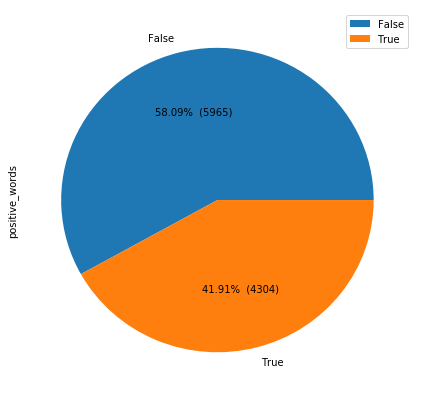

In [197]:
data_positive_likes = data_train['positive_words'].value_counts()
data_positive_likes.plot(kind='pie', legend=True, figsize=(7,7), autopct=make_autopct(data_positive_likes));

### Pie about numbers of words with positive feeling in the definition

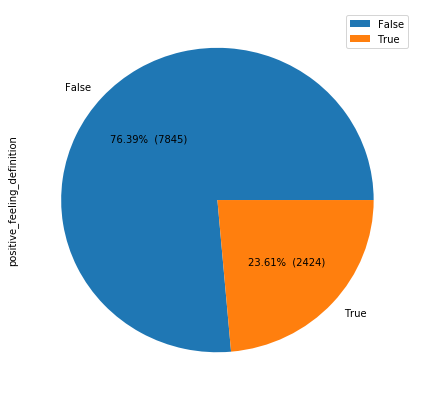

In [200]:
data_train['positive_feeling_definition'] = data_train['statement_feeling_score'] > 0
data_positive_feeling_definition = data_train['positive_feeling_definition'].value_counts()
data_positive_feeling_definition.plot(kind='pie', legend=True, figsize=(7,7), autopct=make_autopct(data_positive_feeling_definition));

### Fake news has more negative sentiments - because of the kind of topics and the words used.

In [209]:
#The key finding from the team's analysis was that, on average, the fake news headlines were more negative 
#than the mainstream ones in each period. Of course, that just shows "that fake news headlines contain more 
#negative words in the title than real news," research scientist Haewoon Kwak told Engadget.
#Inferring meaning from this requires some guesswork, and there are two possible explanations, according to Kwak. Either fake news writers are intentionally doing this for "clickbait" purposes, or they "naturally use more negative words" because of the topics they're writing about.

# Reference : https://www.engadget.com/2016/11/21/clickbait-fake-news-and-the-power-of-feeling/

## Feature Extraction using TF-IDF,word2vec

In [ ]:
#Before we can train an algorithm to classify fake news labels, we need to extract features from it. It means reducing 
#the mass of unstructured data into some uniform set of attributes that an algorithm can understand. 
#For fake news detection, it could be word counts (bag of words). 

In [239]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
import nltk
import nltk.corpus 
from nltk.tokenize import word_tokenize
from gensim.models.word2vec import Word2Vec

In [275]:
#creating feature vector - document term matrix
countV = CountVectorizer()
train_count = countV.fit_transform(data_train['statement'].values)

In [276]:
print(countV)
print(train_count)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)
  (0, 3243)	1
  (0, 7685)	1
  (0, 585)	1
  (0, 11243)	1
  (0, 10983)	1
  (0, 10656)	1
  (0, 5078)	1
  (0, 8333)	1
  (0, 6598)	1
  (0, 1013)	1
  (0, 10935)	1
  (0, 9626)	1
  (1, 720)	1
  (1, 1933)	1
  (1, 4874)	1
  (1, 8511)	1
  (1, 5648)	1
  (1, 1501)	1
  (1, 11057)	1
  (1, 10927)	1
  (1, 7631)	1
  (1, 11085)	1
  (1, 4824)	1
  (1, 7377)	1
  (1, 10375)	2
  :	:
  (10268, 6812)	1
  (10268, 10541)	1
  (10268, 3953)	1
  (10268, 10865)	1
  (10268, 8949)	1
  (10268, 10607)	1
  (10268, 2515)	1
  (10268, 11569)	1
  (10268, 2534)	1
  (10268, 768)	1
  (10268, 11607)	2
  (10268, 12104)	1
  (10268, 3274)	1
  (10268, 10951)	1
  (10

In [298]:
print(countV.get_feature_names()[:25])

['00', '000', '000new', '014', '02', '024', '029', '033', '036', '04', '05', '050', '054th', '06', '07', '075', '08', '081', '09', '092', '095', '10', '100', '100th', '102']


In [278]:
#vocab size
train_count.shape

#check vocabulary using below command
print(countV.vocabulary_)

{'says': 9626, 'the': 10935, 'annies': 1013, 'list': 6598, 'political': 8333, 'group': 5078, 'supports': 10656, 'third': 10983, 'trimester': 11243, 'abortions': 585, 'on': 7685, 'demand': 3243, 'when': 11880, 'did': 3399, 'decline': 3150, 'of': 7629, 'coal': 2442, 'start': 10374, 'it': 6013, 'started': 10375, 'natural': 7377, 'gas': 4824, 'took': 11085, 'off': 7631, 'that': 10927, 'to': 11057, 'begin': 1501, 'in': 5648, 'president': 8511, 'george': 4874, 'bushs': 1933, 'administration': 720, 'hillary': 5362, 'clinton': 2411, 'agrees': 825, 'with': 11973, 'john': 6093, 'mccain': 6926, 'by': 1958, 'voting': 11695, 'give': 4918, 'bush': 1931, 'benefit': 1538, 'doubt': 3649, 'iran': 5960, 'health': 5272, 'care': 2065, 'reform': 9052, 'legislation': 6461, 'is': 5975, 'likely': 6564, 'mandate': 6793, 'free': 4699, 'sex': 9873, 'change': 2225, 'surgeries': 10668, 'economic': 3807, 'turnaround': 11298, 'at': 1228, 'end': 3954, 'my': 7333, 'term': 10886, 'chicago': 2281, 'bears': 1475, 'have': 

In [314]:
#create tf-df frequency features
#tf-idf 
tfidfV = TfidfTransformer()
train_tfidf = tfidfV.fit_transform(train_count)

In [315]:
print(train_tfidf)

  (0, 9626)	0.11059590347781546
  (0, 10935)	0.06779891387915939
  (0, 1013)	0.42672073687857204
  (0, 6598)	0.3215868394934666
  (0, 8333)	0.28556599889671574
  (0, 5078)	0.2927765659166774
  (0, 10656)	0.26712099494824343
  (0, 10983)	0.2746475467653456
  (0, 11243)	0.4085917177272403
  (0, 585)	0.28851508930515957
  (0, 7685)	0.134228161963525
  (0, 3243)	0.3397158586447984
  (1, 10935)	0.0535666676950447
  (1, 11880)	0.30084182401691434
  (1, 3399)	0.1839256454824711
  (1, 3150)	0.2840113366644489
  (1, 7629)	0.07063415878207531
  (1, 2442)	0.25086615700805426
  (1, 10374)	0.24391719716232654
  (1, 6013)	0.12965684397676613
  (1, 10375)	0.45918758897177264
  (1, 7377)	0.2540798130918345
  (1, 4824)	0.20468971351416215
  (1, 11085)	0.1846251902747174
  (1, 7631)	0.19431990720999015
  :	:
  (10268, 10935)	0.04527055668099121
  (10268, 7629)	0.11938945715131273
  (10268, 11057)	0.12327251772550725
  (10268, 5229)	0.09311605601576281
  (10268, 7785)	0.129564636139765
  (10268, 7781)	0.

In [295]:
    
#vocab size
train_count.shape

#check vocabulary using below command
print(countV.vocabulary_)

    #get feature names
    print(countV.get_feature_names()[:25])


#create tf-df frequency features
#tf-idf 
tfidfV = TfidfTransformer()
train_tfidf = tfidfV.fit_transform(train_count)

{'says': 9626, 'the': 10935, 'annies': 1013, 'list': 6598, 'political': 8333, 'group': 5078, 'supports': 10656, 'third': 10983, 'trimester': 11243, 'abortions': 585, 'on': 7685, 'demand': 3243, 'when': 11880, 'did': 3399, 'decline': 3150, 'of': 7629, 'coal': 2442, 'start': 10374, 'it': 6013, 'started': 10375, 'natural': 7377, 'gas': 4824, 'took': 11085, 'off': 7631, 'that': 10927, 'to': 11057, 'begin': 1501, 'in': 5648, 'president': 8511, 'george': 4874, 'bushs': 1933, 'administration': 720, 'hillary': 5362, 'clinton': 2411, 'agrees': 825, 'with': 11973, 'john': 6093, 'mccain': 6926, 'by': 1958, 'voting': 11695, 'give': 4918, 'bush': 1931, 'benefit': 1538, 'doubt': 3649, 'iran': 5960, 'health': 5272, 'care': 2065, 'reform': 9052, 'legislation': 6461, 'is': 5975, 'likely': 6564, 'mandate': 6793, 'free': 4699, 'sex': 9873, 'change': 2225, 'surgeries': 10668, 'economic': 3807, 'turnaround': 11298, 'at': 1228, 'end': 3954, 'my': 7333, 'term': 10886, 'chicago': 2281, 'bears': 1475, 'have': 


['00', '000', '000new', '014', '02', '024', '029', '033', '036', '04', '05', '050', '054th', '06', '07', '075', '08', '081', '09', '092', '095', '10', '100', '100th', '102']


In [299]:
#print training doc term matrix
#we have matrix of size of (10240, 12196) by calling below
def get_countVectorizer_stats():
    
    #vocab size
    train_count.shape

    #check vocabulary using below command
    print(countV.vocabulary_)

    #get feature names
    print(countV.get_feature_names()[:25])


    #create tf-df frequency features
    #tf-idf 
    tfidfV = TfidfTransformer()
    train_tfidf = tfidfV.fit_transform(train_count)

In [300]:
train_tfidf.shape
#get train data feature names 
print(train_tfidf)

  (0, 9626)	0.11059590347781546
  (0, 10935)	0.06779891387915939
  (0, 1013)	0.42672073687857204
  (0, 6598)	0.3215868394934666
  (0, 8333)	0.28556599889671574
  (0, 5078)	0.2927765659166774
  (0, 10656)	0.26712099494824343
  (0, 10983)	0.2746475467653456
  (0, 11243)	0.4085917177272403
  (0, 585)	0.28851508930515957
  (0, 7685)	0.134228161963525
  (0, 3243)	0.3397158586447984
  (1, 10935)	0.0535666676950447
  (1, 11880)	0.30084182401691434
  (1, 3399)	0.1839256454824711
  (1, 3150)	0.2840113366644489
  (1, 7629)	0.07063415878207531
  (1, 2442)	0.25086615700805426
  (1, 10374)	0.24391719716232654
  (1, 6013)	0.12965684397676613
  (1, 10375)	0.45918758897177264
  (1, 7377)	0.2540798130918345
  (1, 4824)	0.20468971351416215
  (1, 11085)	0.1846251902747174
  (1, 7631)	0.19431990720999015
  :	:
  (10268, 10935)	0.04527055668099121
  (10268, 7629)	0.11938945715131273
  (10268, 11057)	0.12327251772550725
  (10268, 5229)	0.09311605601576281
  (10268, 7785)	0.129564636139765
  (10268, 7781)	0.

In [301]:
def get_tfidf_stats():
    train_tfidf.shape
    #get train data feature names 
    print(train_tfidf.A[:10])


    #bag of words - with n-grams
    #countV_ngram = CountVectorizer(ngram_range=(1,3),stop_words='english')
    #tfidf_ngram  = TfidfTransformer(use_idf=True,smooth_idf=True)

    tfidf_ngram = TfidfVectorizer(stop_words='english',ngram_range=(1,4),use_idf=True,smooth_idf=True)

In [302]:
#POS Tagging
import nltk
nltk.download('treebank')
tagged_sentences = nltk.corpus.treebank.tagged_sents()

cutoff = int(.75 * len(tagged_sentences))
training_sentences = data_train['bag_of_words']
 
print(training_sentences)

[nltk_data] Downloading package treebank to
[nltk_data]     C:\Users\anuks\AppData\Roaming\nltk_data...
[nltk_data]   Package treebank is already up-to-date!
0        say anni list polit group support third trimes...
1        declin coal start questmark start natur gas to...
2        hillari clinton agre john mccain vote give geo...
3        health care reform legisl like mandat free sex...
4                         econom turnaround start end term
5        chicago bear start quarterback last number yea...
6                     jim dunnam live district repres year
7        person stage work activ last year pass along r...
8        howev took dollar number million oregon lotter...
9        say gop primari oppon glenn grothman joe leibh...
10       first time histori share nation popular vote m...
11       sinc number near number million american slip ...
12       mitt romney governor massachusett didnt slow r...
13       economi bled dollar number billion due govern ...
14       afford 

In [303]:
#training POS tagger based on words
def features(sentence, index):
    """ sentence: [w1, w2, ...], index: the index of the word """
    return {
        'word': sentence[index],
        'is_first': index == 0,
        'is_last': index == len(sentence) - 1,
        'is_capitalized': sentence[index][0].upper() == sentence[index][0],
        'is_all_caps': sentence[index].upper() == sentence[index],
        'is_all_lower': sentence[index].lower() == sentence[index],
        'prefix-1': sentence[index][0],
        'prefix-2': sentence[index][:2],
        'prefix-3': sentence[index][:3],
        'suffix-1': sentence[index][-1],
        'suffix-2': sentence[index][-2:],
        'suffix-3': sentence[index][-3:],
        'prev_word': '' if index == 0 else sentence[index - 1],
        'next_word': '' if index == len(sentence) - 1 else sentence[index + 1],
        'has_hyphen': '-' in sentence[index],
        'is_numeric': sentence[index].isdigit(),
        'capitals_inside': sentence[index][1:].lower() != sentence[index][1:]
}

In [304]:
#helper function to strip tags from tagged corpus	
def untag(tagged_sentence):
    return [w for w, t in tagged_sentence]

In [305]:
#Using Word2Vec 
with open("glove.6B.50d.txt", "rb") as lines:
    w2v = {line.split()[0]: np.array(map(float, line.split()[1:]))
for line in lines}

In [306]:
class MeanEmbeddingVectorizer(object):
    def __init__(self, word2vec):
        self.word2vec = word2vec
        # if a text is empty we should return a vector of zeros
        # with the same dimensionality as all the other vectors
        self.dim = len(word2vec.itervalues().next())

    def fit(self, X, y):
        return self

    def transform(self, X):
        return np.array([
            np.mean([self.word2vec[w] for w in words if w in self.word2vec]
                    or [np.zeros(self.dim)], axis=0)
            for words in X
        ])


In [310]:
train_tfidf.shape

(10269, 12142)

In [296]:
from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]

from pprint import pprint 

for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.24118237251929425),
 (1, 0.5203792822448084),
 (2, 0.35449813782559153),
 (3, 0.290662659691886),
 (4, 0.32876569539252326),
 (5, 0.28971579543678105),
 (6, 0.19282804642504422),
 (7, 0.48132938228906624)]


In [237]:
countV

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

### Classification

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)
  (0, 3278)	1
  (0, 7728)	1
  (0, 615)	1
  (0, 11296)	1
  (0, 11036)	1
  (0, 10709)	1
  (0, 5115)	1
  (0, 8376)	1
  (0, 6639)	1
  (0, 1044)	1
  (0, 10988)	1
  (0, 9676)	1
  (1, 751)	1
  (1, 1964)	1
  (1, 4910)	1
  (1, 8554)	1
  (1, 5687)	1
  (1, 1532)	1
  (1, 11110)	1
  (1, 10980)	1
  (1, 7674)	1
  (1, 11138)	1
  (1, 4860)	1
  (1, 7418)	1
  (1, 10426)	2
  :	:
  (10239, 6853)	1
  (10239, 10594)	1
  (10239, 3989)	1
  (10239, 10918)	1
  (10239, 8996)	1
  (10239, 10660)	1
  (10239, 2549)	1
  (10239, 11622)	1
  (10239, 2568)	1
  (10239, 799)	1
  (10239, 11660)	2
  (10239, 12158)	1
  (10239, 3309)	1
  (10239, 11004)	1
  (10

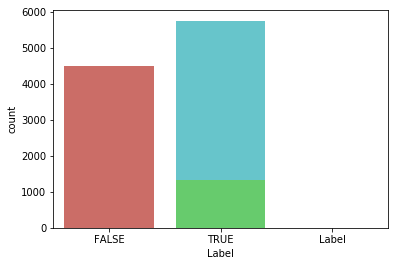

In [361]:
import DataPrep
import FeatureSelection
import numpy as np
import pandas as pd
import pickle
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import  LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import KFold
from sklearn.metrics import confusion_matrix, f1_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

In [362]:
#string to test
doc_new = ['obama is running for president in 2022']

In [365]:
#first we will use bag of words techniques

#building classifier using naive bayes 
nb_pipeline = Pipeline([
        ('NBCV',FeatureSelection.countV),
        ('nb_clf',MultinomialNB())])

nb_pipeline.fit(DataPrep.train_news['Statement'],DataPrep.train_news['Label'])
predicted_nb = nb_pipeline.predict(DataPrep.test_news['Statement'])
np.mean(predicted_nb == DataPrep.test_news['Label'])

0.6072128577028616

In [366]:
#building classifier using logistic regression
logR_pipeline = Pipeline([
        ('LogRCV',FeatureSelection.countV),
        ('LogR_clf',LogisticRegression())
        ])

logR_pipeline.fit(DataPrep.train_news['Statement'],DataPrep.train_news['Label'])
predicted_LogR = logR_pipeline.predict(DataPrep.test_news['Statement'])
np.mean(predicted_LogR == DataPrep.test_news['Label'])


0.5985887887103096

In [367]:
#building Linear SVM classfier
svm_pipeline = Pipeline([
        ('svmCV',FeatureSelection.countV),
        ('svm_clf',svm.LinearSVC())
        ])

svm_pipeline.fit(DataPrep.train_news['Statement'],DataPrep.train_news['Label'])
predicted_svm = svm_pipeline.predict(DataPrep.test_news['Statement'])
np.mean(predicted_svm == DataPrep.test_news['Label'])

0.5723245785966288

In [368]:
#using SVM Stochastic Gradient Descent on hinge loss
sgd_pipeline = Pipeline([
        ('svm2CV',FeatureSelection.countV),
        ('svm2_clf',SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, n_iter=5))
        ])

sgd_pipeline.fit(DataPrep.train_news['Statement'],DataPrep.train_news['Label'])
predicted_sgd = sgd_pipeline.predict(DataPrep.test_news['Statement'])
np.mean(predicted_sgd == DataPrep.test_news['Label'])


#random forest
random_forest = Pipeline([
        ('rfCV',FeatureSelection.countV),
        ('rf_clf',RandomForestClassifier(n_estimators=200,n_jobs=3))
        ])
    
random_forest.fit(DataPrep.train_news['Statement'],DataPrep.train_news['Label'])
predicted_rf = random_forest.predict(DataPrep.test_news['Statement'])
np.mean(predicted_rf == DataPrep.test_news['Label'])

C:\Users\anuks\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


0.6248529988239906

### Random Forest gives a better accuracy compared to the other algorithms 

In [369]:
#User defined functon for K-Fold cross validatoin
def build_confusion_matrix(classifier):
    
    k_fold = KFold(n=len(DataPrep.train_news), n_folds=5)
    scores = []
    confusion = np.array([[0,0],[0,0]])

    for train_ind, test_ind in k_fold:
        train_text = DataPrep.train_news.iloc[train_ind]['Statement'] 
        train_y = DataPrep.train_news.iloc[train_ind]['Label']
    
        test_text = DataPrep.train_news.iloc[test_ind]['Statement']
        test_y = DataPrep.train_news.iloc[test_ind]['Label']
        
        classifier.fit(train_text,train_y)
        predictions = classifier.predict(test_text)
        
        confusion += confusion_matrix(test_y,predictions)
        score = f1_score(test_y,predictions)
        scores.append(score)
    
    return (print('Total statements classified:', len(DataPrep.train_news)),
    print('Score:', sum(scores)/len(scores)),
    print('score length', len(scores)),
    print('Confusion matrix:'),
    print(confusion))
    
#K-fold cross validation for all classifiers
build_confusion_matrix(nb_pipeline)
build_confusion_matrix(logR_pipeline)
build_confusion_matrix(svm_pipeline)
build_confusion_matrix(sgd_pipeline)
build_confusion_matrix(random_forest)

Total statements classified: 10240
Score: 0.66961153965076
score length 5
Confusion matrix:
[[2118 2370]
 [1664 4088]]
Total statements classified: 10240
Score: 0.6469090977975251
score length 5
Confusion matrix:
[[2252 2236]
 [1933 3819]]
Total statements classified: 10240
Score: 0.6104687487924283
score length 5
Confusion matrix:
[[2260 2228]
 [2246 3506]]


C:\Users\anuks\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\anuks\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\anuks\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\anuks\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\anuks\Anaconda3\lib\site-packages\sklearn\linear_model\stochast

Total statements classified: 10240
Score: 0.6234401754945652
score length 5
Confusion matrix:
[[2503 1985]
 [2210 3542]]
Total statements classified: 10240
Score: 0.6978583868245876
score length 5
Confusion matrix:
[[1822 2666]
 [1240 4512]]


(None, None, None, None, None)

### References:
- https://www.theguardian.com/books/2017/nov/02/fake-news-is-very-real-word-of-the-year-for-2017
- https://github.com/sumeetkr/AwesomeFakeNews
- https://www.pheme.eu/software-downloads/  
- https://towardsdatascience.com/understanding-feature-engineering-part-3-traditional-methods-for-text-data-f6f7d70acd41
- https://www.politico.com/tag/fake-news 
- https://nycdatascience.com/blog/student-works/identifying-fake-news-nlp/
- https://medium.com/@Genyunus/detecting-fake-news-with-nlp-c893ec31dee8
- https://medium.com/@ttr0002/looking-at-the-data-on-fake-news-f509178c9e51
- https://github.com/bs-detector/bs-detector
- https://opendata.stackexchange.com/questions/10584/what-are-the-available-datasets-for-fake-news-detection
- http://sdsawtelle.github.io/blog/output/spam-classification-part1-text-processing.html#Standardizing-White-Space-and-Total-Word-Count
- https://blog.insightdatascience.com/topic-modeling-and-sentiment-analysis-to-pinpoint-the-perfect-doctor-6a8fdd4a3904
- https://nlpforhackers.io/topic-modeling/